##  Выпускной проект курса Аналитика даннных от Яндекс Практикум
  

# Поиск клиентов телеком-компании "Нупозвони!" с неоптимальными тарифами

## 1. Введение

### Заказчик: 
Телеком-компания "НуПозвони!" в лице коммерческого директора

### Цель: 
Увеличить лояльность клиентов за счет их перевода на оптимальные тарифы таким образом, чтобы не допустить критического для компании падения выручки.

### Основная задача: 
Изучить данные за три месяца по активным пользователям и найти клиентов, которые в настоящий момент используют неоптимальные для себя тарифы. Выяснить, что произойдет с выручкой телеком-компании, если предложить клиентам оптимизацию тарифных планов. Определить группы клиентов, на удержание которых стоит обратить основное внимание.

### Подзадачи:
    1. Выявить активных пользователей. Активными пользователями приняли считать клиентов с минимальной активностью 10 дней в течении последнего месяца. С теми, кто в ноябре ушел в отток, не работаем.
    2. Для каждого активного пользователя посчитать расходы по тарифным планам.
    3. Выявить клиентов, которые переплачивают за услуги телеком-компании на текущем тарифе.
    4. Посчитать, сколько именно переплачивают клиенты.
    5. Посчитать общую выручку телеком-компании для всех клиентов (активных и неактивных) и общую выручку (для активных и неактивных клиентов)  после перехода активных клиентов  на оптимальный для них тариф.
    6. Рассмотреть детально выручку по всем выявленным клиентам на неоптимальных тарифах, найти группы клиентов, которые приносят максимальный доход телеком-компании, и какие минимальный.
    7. Сформулировать для телеком-компании предложение, стоит ли переводить на оптимальный тариф всех выявленных клиентов?     Или же во избежание сильного падения выручки стоит ограничиться определенными группами клиентов? Если да, то какие группы клиентов мы рекомендуем для перевода на оптимальный тариф и что при этом будет происходить с выручкой?

### Итоговый результат: 
Представить в виде презентации для коммерческого директора и дашборда. Далее отчетность преоставлять с регулярностью раз в три месяца.

## 2. Исходные данные

«НуПозвони» — провайдер виртуальной телефонии. Его клиенты — колл-центры (юр. лица), которые:
- распределяют входящие вызовы по своим операторам;
- обеспечивают исходящие вызовы от операторов.


### Тарифная сетка
**В Телекоме действуют следующие тарифные планы:**

|   Тарифный план    |     Ежемесячная плата    |     Входящие    |     Исходящие звонки* внутри сети**|     Лимит внут. исх    |     Исходящие   звонки*, кроме внутренних    | Плата за 1 оператора |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|     А    |     4 000 ₽    |     0    |     0.10 ₽/мин.    |     2000    |     0.3 ₽/мин.    | 50 ₽/оператор |
|     В    |     2 000 ₽    |     0    |     0.15 ₽/мин.    |     500     |     0.5 ₽/мин.    | 150 ₽/оператор |
|     С    |     1 000 ₽    |     0    |     0.30 ₽/мин.    |     0       |     0.7 ₽/мин.    | 300 ₽/оператор |

\* исходящие звонки с учетом времени ожидания; <br>
\** на некоторых тарифах на исходящие звонки внутри сети существует бесплатный лимит в определенное количество минут (см. тарифный план); цена приведена на расход свыше установленного лимита.

**Расходы клиента состоят из:**
1. ежемесячной платы +
2. платы за перерасход по внутренним исходящим звонкам, с учетом времени ожидания (`total_call_duration`) +
3. платы за внешние исходящие звонки, с учетом времени ожидания (`total_call_duration`) +
4. платы оператора

**Клиенты, которые используют неэффективно действующий тариф**: такие клиенты, которые могли бы иметь меньшие расходы в месяц, если бы использовали один из других тарифных планов. Например, клиент использует тариф `В` и платит `5250 ₽`, но на тарифе `С` он бы платил бы `5150 ₽`, то такой клиент использует свой тариф неэффективно, и ему можно предложить сменить его.


### Привила выставления счета

**Счета** выставляются за прошедший календарный месяц, поэтому датой списания можно считать **1-е число каждого месяца**. Остаток внутреннего исходящего трафика сгорает на начало месяца.

**Тарификация** происходит на основе кумулятивных показателей за период расчета (календарный месяц). Общая продолжительность звонков (в минутах) за день по каждому оператору округляется **в большую сторону**. 


### Исходные данные

В работу поступило два датасета, которые характеризуют использование услуг «НуПозвони».

1. датасет `telecom_dataset.csv`
- `user_id` - идентификатор клиента,
- `date` - дата статистики;
- `direction` - направление вызовов: out — исходящий вызов, in — входящий; 
- `internal` - маркер внутренних и внешних вызовов; вызовы между сотрудниками одного колл-центра называют внутренними, остальные — внешними.
- `operator_id` - идентификатор оператора;
- `is_missed_call` - маркер пропущенных вызовов;
- `calls_count` - количество звонков;
- `call_duration` - длительность **всех звонков без учёта времени ожидания**;
- `total_call_duration` - длительность **всех звонков с учётом времени ожидания**.

2. датасет `telecom_clients.csv`
- `user_id` — идентификатор клиента;
- `tariff_plan` — тарифный план клиента;
- `date_start` — дата регистрации клиента в сервисе.

---


## 3. Содержание проекта

###  Загрузка данных и их подготовка к исследовательской части:
1. загрузка данных и ознакомление с датасетами;
2. объединение данных;
3. обработка пропусков;
4. проверка соответствия типов данных и их изменение;
5. обработка дубликатов;
6. посмотреть на наличие ошибок в данных (отрицательное время ожидания, операторы с длительностью звонков более 24 часов в день и пр.)


### Проверка статистических гипотез
1. При переводе на оптимальный тариф всех активных клиентов средний чек упадет значительно.
2. При переводе на оптимальный тариф определенной группы клиентов средний чек упадет незначительно.

### Выводы

### Рекомендации

## 4. Предобработка данных

###  4.1. Загрузка данных и ознакомление с датасетами.

Загружаем необходимые библиотеки:

In [3]:
!pip install matplotlib -U
!pip install seaborn -U
import pandas as pd
import scipy.stats as st
import datetime
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import math as mth
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest

Загружаем данные о клиентах:

In [9]:
clients = pd.read_csv('C:\\Users\\77281\\Downloads\\telecom_clients.csv')
   
clients.head(10)

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16
5,167764,A,2019-09-30
6,167050,A,2019-08-29
7,168252,A,2019-10-17
8,168495,A,2019-10-28
9,167879,A,2019-10-03


Первичное ознакомление с датасетом:

In [10]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


В датасете имеется информации о 732 клиентах;
в столбце с датой регистрации данные находятся в строковом типе.

Считаем пропуски:

In [11]:
clients.isna().sum()

user_id        0
tariff_plan    0
date_start     0
dtype: int64

Пропусков не обнаружено.

Считаем явные дубликаты

In [12]:
clients.duplicated().sum()

0

Явных дубликатов не обнаружено.

Проверяем на дубликаты идентификаторы пользователей:

In [13]:
clients['user_id'].duplicated().sum()

0

Все идентификаторы пользователей уникальны.

Загружаем данные второго датасета:

In [14]:
dataset = pd.read_csv('C:\\Users\\77281\\Downloads\\telecom_dataset.csv')

dataset.head(10)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25
5,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,False,2,3,29
6,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,True,8,0,50
7,166377,2019-08-05 00:00:00+03:00,in,False,NaN,True,6,0,35
8,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,True,8,0,50
9,166377,2019-08-06 00:00:00+03:00,in,False,NaN,True,4,0,62


Смотрим общую информацию о датасете:

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


Датасет состоит из
- 53902 строк;
- 9 колонок;
- в столбце с маркером внутренних звонков данные находятся в неправильном типе;
- данные в столбце с датой в строковом типе.

###### Вывод:

В таблицах представлены данные о звонках операторов колл-центров и о тарифах колл-центров. Форма таблицы подходит для дальнейшего анализа. Название столбцов без пробелов, несколько слов разделяются нижним подчеркиванием, на одном языке и в одном регистре, отображают в краткой форме какого рода информация содержится в каждом столбце.
Выявили наличие пропусков в столбцах 'internal' и 'operator_id', это необходимо обработать. 
Также необходимо проверить соответствие типов данных в столбцах. 

### 4.2. Обработка пропусков

Количество строк до предобработки:

In [16]:
first_shape = dataset.shape
first_shape

(53902, 9)

Объявляем функцию:

In [17]:
def nan_count(dataset, column):
    '''
    Функция для определения доли пропущенных значений в столбце. 
    data - таблица для поиска пропущенных значений
    column - название столбца, в котором ищутся попущенные значения
    '''
    print('Доля пропущенных значений в {}: {:.2%}'.format(column, dataset[column].isna().sum() / dataset.shape[0]))

Посчитаем процент пропусков в 'internal':

In [18]:
nan_count(dataset, 'internal')

Доля пропущенных значений в internal: 0.22%


Доля пропущенных значений небольшая, поэтому можем удалить эти строки:

In [19]:
dataset = dataset.dropna(subset=['internal']) 

Посчитаем процент пропусков в 'operator_id':

In [20]:
nan_count(dataset, 'operator_id')

Доля пропущенных значений в operator_id: 15.09%


Пропуски составляют более 15 процентов . Это слишком много для простого удаления. Надо посмотреть подробнее эти строки, чтобы понять причину пропусков.

Рассмотрим количество значений в бинарных столбцах:

In [21]:
for col in ['direction', 'internal', 'is_missed_call']:
    print(dataset[dataset['operator_id'].isna()][col].value_counts(), '\n')

in     7917
out     198
Name: direction, dtype: int64 

False    7760
True      355
Name: internal, dtype: int64 

True     7993
False     122
Name: is_missed_call, dtype: int64 



Мы видим, что оператор не определился в основном для входящих внешних пропущенных звонков. Возможно, колл-центр был перегружен и не удалось определить оператора до того, как клиент отключился. Остальные случаи, вроде неопределённого оператора при принятом звонке или при исходящем звонке, больше похожи на ошибку и их немного. Такие строки можно оставить, поскольку, несмотря на отсуствие данных об операторе, сохранены другие метрики. 
Pаполним ghjgecrb целыми значениями - например, нулями

In [22]:
dataset['operator_id'] = dataset['operator_id'].fillna(0)

###### Вывод:

В данных был обнаружен большой процент строк с неопределённым идентификатором оператора 'operator_id'. Большинство из таких вызовов - входящие внешние пропущенные вызовы. рекомендация для заказчика: уточнить, может ли причиной этого быть загруженность колл-центра.

### 4.3. Проверка соответствия типов данных и их изменение

В столбце 'date' можно убрать время, так как оно не указано. Для столбцов 'date' данные лучше преобразовать в тип данных дата.

In [23]:
dataset['date'] = pd.to_datetime(dataset['date']).dt.date

dataset['date'] = pd.to_datetime(dataset['date'], format='%Y-%m-%d')

clients['date_start'] = pd.to_datetime(clients['date_start'], format='%Y-%m-%d')

Значения в столбце 'internal' можно заменить на булевый тип. После замены пропусков в 'operator_id' на 0 мы можем изменить тип данных на целочисленный.

In [24]:
dataset = dataset.astype({'internal': 'bool',
                         'operator_id': 'int64'})

Булевые значения заменяем на более понятные названия:

In [25]:
dataset['internal'] = dataset['internal'].apply(
    lambda x: 'внутренний' if x == True else 'внешний'
)
dataset['is_missed_call'] = dataset['is_missed_call'].apply(
    lambda x: 'пропущен' if x == True else 'принят'
)
dataset['direction'] = dataset['direction'].apply(
    lambda x: 'входящий' if x == 'in' else 'исходящий'
)

###### Вывод:

 Все данные приведены к удобным для дальнейшей работы типам.

### 4.4. Обработка дубликатов

Проверим, есть ли строки-дубликаты?

In [26]:
print('Количество строк-дубликатов:', dataset.duplicated().sum())

Количество строк-дубликатов: 4893


Посмотрим на особенности данных, содержащие дубликаты, более детально при помощи группировки:

In [27]:
tmp = pd.read_csv('C:\\Users\\77281\\Downloads\\telecom_dataset.csv')

(tmp[tmp.duplicated() == True] # оставляем только дубликаты
 .groupby(['is_missed_call','direction','internal']) # группируем по важным признакам
 .agg({'user_id':'nunique','calls_count':'sum'}) # подсчитываем ключевые метрики
 .assign(calls_share = lambda x: x['calls_count'] / tmp[tmp.duplicated() == True].calls_count.sum()) # смотрим на доли
)

user_id  calls_count  calls_share
is_missed_call direction internal                                   
False          in        False         200         9831     0.122817
                         True           14           41     0.000512
               out       False         162        33110     0.413637
                         True           34          672     0.008395
True           in        False         209         9060     0.113185
                         True           21           77     0.000962
               out       False         148        26803     0.334845
                         True           60          443     0.005534

Посмотрим на особенности данных, если удалим дубликаты:

In [28]:

(tmp[tmp.duplicated() != True]
 .groupby(['is_missed_call','direction','internal'])
 .agg({'user_id':'nunique','calls_count':'sum'})
 .assign(calls_share = lambda x: x['calls_count'] / tmp[tmp.duplicated() != True].calls_count.sum())
)

user_id  calls_count  calls_share
is_missed_call direction internal                                   
False          in        False         273        92786     0.115018
                         True           47          677     0.000839
               out       False         209       329306     0.408209
                         True           83         7963     0.009871
True           in        False         303       103219     0.127951
                         True           76          944     0.001170
               out       False         214       266518     0.330377
                         True          140         5071     0.006286

Распределение различных типов звонков в данных с дубликатами и без - примерно одинаковое, так же как и по клиентам. Т.е. нет закономерности в появлении дубликатов, и возможно, это какая-то общая техническая ошибка.
Поэтому строки - дубликаты можно удалить:

In [29]:
dataset = dataset.drop_duplicates().reset_index(drop=True)

###### Вывод:

Удалили 4893 строки-дубликата.

### 4.5. Проверка на наличие ошибок в данных.

Рассмотрим, какие ошибки могут быть выявлены в приведенных данных? Исходя из простой логики, изучим два возможных варианта:
- длительность звонков по операторам не может быть больше 24 часов в день;
- время ожидания звонка не может быть отрицательным.

Исследуем таблицу на наличие аномальных значений в столбцах call_duration (длительность звонка без учета времени ожидания) и total_call_duration (длительность звонка с учетом времени ожидания). Построим диаграммы размаха:

Объявляем функцию аннотирования медианы:

In [30]:
def add_median_labels(ax, precision='.0f'):
    lines = ax.get_lines()
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    for median in lines[4:len(lines):lines_per_box]:
        x, y = (data.mean() for data in median.get_data())
        # choose value depending on horizontal or vertical plot orientation
        value = x if (median.get_xdata()[1] - median.get_xdata()[0]) == 0 else y
        text = ax.text(x, y, f'{value:{precision}}', ha='center', va='center',
                       color='white', fontweight='bold', size=8, bbox=dict(facecolor='#445A64'))

Добавляем стили к графикам:

In [31]:
sns.set_palette('Dark2')
sns.set_style('darkgrid', {'patch.edgecolor': 'black', 'axes.edgecolor': 'black'})

Строим диаграммы размаха метрик 'calls_count','call_duration', 'total_call_duration':

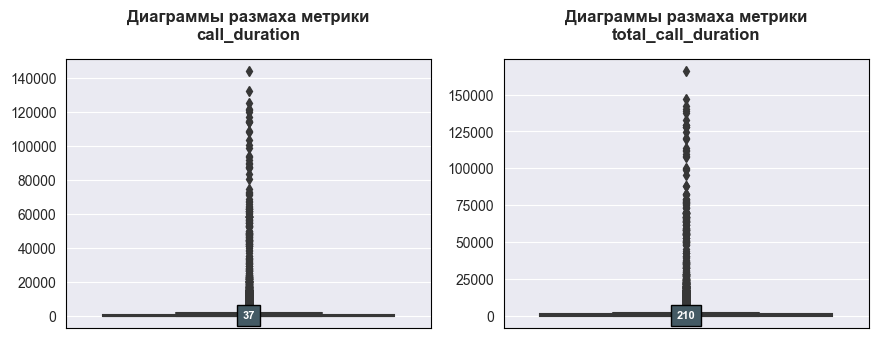

In [32]:
def boxplot_def():
    fig = plt.figure(figsize=(16,3.5))
    for i, metric in enumerate(['call_duration', 'total_call_duration']):
        ax_metrics_calls = fig.add_subplot(1,3,i+1)
        ax_metrics_calls = sns.boxplot(y=dataset[metric])
        ax_metrics_calls.margins(0.05, 0.05)
        plt.title('Диаграммы размаха метрики\n' + metric, fontweight='bold', pad=14) 
        plt.ylabel('')
        add_median_labels(ax_metrics_calls)
    plt.show()
    
boxplot_def()    

Учитывая, что количество звонков и длительность звонков представлены в расчете на одного оператора, длительность звонков не может быть больше 24 часов в день (86400 сек.). На диаграмме размаха видим наличие выбросов 140000 сек. и более.
Отберем в отдельную таблицу продолжительность звонков без ожидания 'call_duration' больше 86400 секунд и посмотрим на статистики:

In [33]:
dataset[(dataset['call_duration'] >= 86400)].describe(include='all', datetime_is_numeric=True).fillna('')

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
count,23.0,23,23,23,23.0,23,23.0,23.0,23.0
unique,,,1,1,,1,,,
top,,,исходящий,внешний,,принят,,,
freq,,,23,23,,23,,,
mean,166582.0,2019-09-19 08:20:52.173913088,,,885876.0,,895.347826,107282.391304,123545.869565
min,166582.0,2019-09-02 00:00:00,,,885876.0,,314.0,86910.0,95440.0
25%,166582.0,2019-09-10 00:00:00,,,885876.0,,684.5,92806.5,110651.5
50%,166582.0,2019-09-19 00:00:00,,,885876.0,,863.0,108207.0,124787.0
75%,166582.0,2019-09-28 12:00:00,,,885876.0,,1100.0,118676.0,135016.0
max,166582.0,2019-10-10 00:00:00,,,885876.0,,1480.0,144395.0,166155.0


В статистиках только один клиент user_id = 166582. Причина аномалий может быть связана как с самим клиентом (настройка оборудования) или с ошибками при сборе данных. Учитывая количество аномалий, полностью удалим данные клиента 166582. Рекомендация: передать данные клиента user_id = 166582  в техническую службу.

In [34]:
dataset = dataset[(dataset['user_id'] != 166582)].reset_index(drop=True)

Cнова посмотрим на диаграммы:

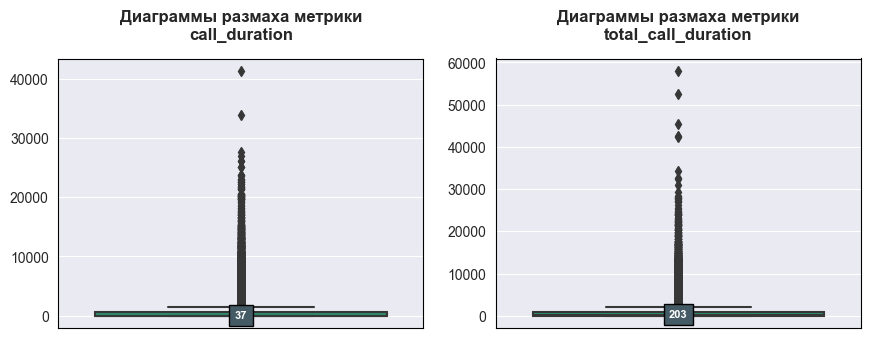

In [35]:
boxplot_def()

Теперь *'call_duration'* (длительность звонка без учета времени ожидания) и *'total_call_duration'* (длительность звонка с учетом времени ожидания) укладываются в реальные временные рамки.

Проверим таблицу на наличие звонков с длительностью без учёта времени ожидания *'call_duration'* больше длительности с учётом времени ожидания *'total_call_duration'*:

In [36]:
print('Количество звонков с длительностью без учёта времени ожидания больше, чем с учётом времени ожидания:',
      len(dataset.query('call_duration > total_call_duration')))

Количество звонков с длительностью без учёта времени ожидания больше, чем с учётом времени ожидания: 0


Аномалии не обнаружены.

Датасет **dataset** после удаления дубликатов и пропусков не содержит грубых аномалий.

Рассчитаем общее количество удаленных данных в исходном датасете:

In [37]:
print('Процент удалённых строк: {:.2%}'.format(1 - dataset.shape[0] / first_shape[0]))

Процент удалённых строк: 10.63%


Для дальнейшего анализа добавим новые столбцы: день недели и месяц наблюдения.
Период наблюдения - первый и последний день наблюдений.

In [38]:
print('Дата начала наблюдений:', dataset['date'].min())
print('Дата окончания наблюдений:',dataset['date'].max())

Дата начала наблюдений: 2019-08-02 00:00:00
Дата окончания наблюдений: 2019-11-28 00:00:00


Столбец с днем недели:

In [39]:
dataset['weekday'] = dataset['date'].dt.day_name()

Добавляем столбец с месяцем наблюдения:

In [40]:
dataset['month'] = dataset['date'].dt.strftime('%B')

Посмотрим на наш датасет и его характеристики после завершения предобработки данных:

In [41]:
dataset.head(10)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,weekday,month
0,166377,2019-08-04,входящий,внешний,0,пропущен,2,0,4,Sunday,August
1,166377,2019-08-05,исходящий,внутренний,880022,пропущен,3,0,5,Monday,August
2,166377,2019-08-05,исходящий,внутренний,880020,пропущен,1,0,1,Monday,August
3,166377,2019-08-05,исходящий,внутренний,880020,принят,1,10,18,Monday,August
4,166377,2019-08-05,исходящий,внешний,880022,пропущен,3,0,25,Monday,August
5,166377,2019-08-05,исходящий,внешний,880020,принят,2,3,29,Monday,August
6,166377,2019-08-05,исходящий,внешний,880020,пропущен,8,0,50,Monday,August
7,166377,2019-08-05,входящий,внешний,0,пропущен,6,0,35,Monday,August
8,166377,2019-08-06,входящий,внешний,0,пропущен,4,0,62,Tuesday,August
9,166377,2019-08-06,исходящий,внешний,881278,пропущен,3,0,29,Tuesday,August


In [42]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48172 entries, 0 to 48171
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              48172 non-null  int64         
 1   date                 48172 non-null  datetime64[ns]
 2   direction            48172 non-null  object        
 3   internal             48172 non-null  object        
 4   operator_id          48172 non-null  int64         
 5   is_missed_call       48172 non-null  object        
 6   calls_count          48172 non-null  int64         
 7   call_duration        48172 non-null  int64         
 8   total_call_duration  48172 non-null  int64         
 9   weekday              48172 non-null  object        
 10  month                48172 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 4.0+ MB


###### Вывод:

- На выходе имеем датасет, который больше чем на 10% отличается от начального ввиду большого количества строк-дубликатов и обнаруженных аномалий у клиента user_id = 166582.
- В данных был обнаружен большой процент строк с неопределённым идентификатором оператора 'operator_id'. Большинство из таких вызовов - входящие внешние пропущенные вызовы. 
Рекомендация: уточнить в технической службе, может ли причиной этого быть загруженность колл-центра.
- Все данные приведены к удобным для дальнейшей работы типам. Значения в столбце 'internal' заменили на булевый тип. После замены пропусков в 'operator_id' на 0 изменили тип данных на целочисленный.
- Выявили и удалили 4893 строки-дубликата.
- Выявили аномалии в столбце call_duration (длительность звонка без учета времени ожидания) у клиента user_id = 166582. Причина аномалий может быть связана как с самим клиентом (настройка оборудования) или с ошибками при сборе данных. Учитывая количество аномалий, полностью удалили данные клиента 166582. Рекомендация: передать данные клиента user_id = 166582  в техническую службу.
- Добавили два новых столбца: день недели и месяц наблюдения.

## 5. Исследовательский анализ данных.

### 5.1. Изучение данных в разрезе тарифного плана.

Объединим данные в одну таблицу:

In [43]:
dataset_clients = dataset.merge(clients, on = 'user_id')
dataset_clients.head(10)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,weekday,month,tariff_plan,date_start
0,166377,2019-08-04,входящий,внешний,0,пропущен,2,0,4,Sunday,August,B,2019-08-01
1,166377,2019-08-05,исходящий,внутренний,880022,пропущен,3,0,5,Monday,August,B,2019-08-01
2,166377,2019-08-05,исходящий,внутренний,880020,пропущен,1,0,1,Monday,August,B,2019-08-01
3,166377,2019-08-05,исходящий,внутренний,880020,принят,1,10,18,Monday,August,B,2019-08-01
4,166377,2019-08-05,исходящий,внешний,880022,пропущен,3,0,25,Monday,August,B,2019-08-01
5,166377,2019-08-05,исходящий,внешний,880020,принят,2,3,29,Monday,August,B,2019-08-01
6,166377,2019-08-05,исходящий,внешний,880020,пропущен,8,0,50,Monday,August,B,2019-08-01
7,166377,2019-08-05,входящий,внешний,0,пропущен,6,0,35,Monday,August,B,2019-08-01
8,166377,2019-08-06,входящий,внешний,0,пропущен,4,0,62,Tuesday,August,B,2019-08-01
9,166377,2019-08-06,исходящий,внешний,881278,пропущен,3,0,29,Tuesday,August,B,2019-08-01


Построим график распределения количества клиентов по тарифным планам:

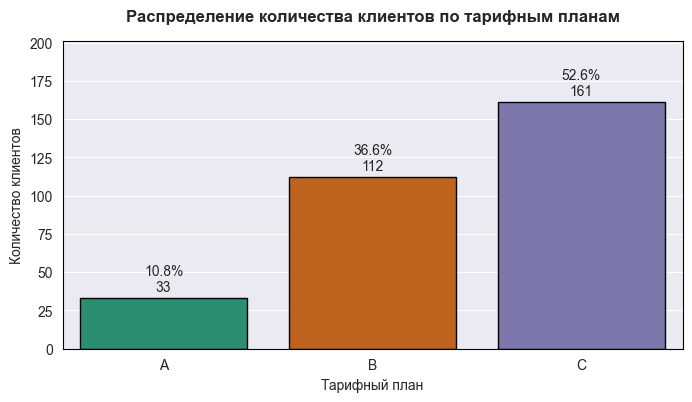

In [44]:
tariff_gr = dataset_clients.groupby(['tariff_plan']).agg({'user_id': 'nunique'})
plt.figure(figsize=(8, 4))
ax_tariff = sns.barplot(x=tariff_gr.index, y=tariff_gr['user_id'])
ax_tariff.margins(0.03, 0.25)
ax_tariff.set_title('Распределение количества клиентов по тарифным планам', fontweight='bold', pad=14)
ax_tariff.set_xlabel('Тарифный план')
ax_tariff.set_ylabel('Количество клиентов')
for c in ax_tariff.containers:
    labels = [f'{v.get_height()/tariff_gr.user_id.sum():0.1%}\n{v.get_height():.0f}' for v in c]
    ax_tariff.bar_label(c, labels=labels, label_type='edge', padding=3)
plt.show()

###### Вывод: 

Распределение клиентов по тарифам неравномерное: на самом дорогом тарифе самое меньшее количество клиентов, а наибольшее количество клиентов на самом дешевом тарифе. Тариф "А" выбрали 33 (10,8%), тариф "В" - 112 (36,6%) и тариф "С" - 161 (52,6%) клиентов.

Построим график распределения количества операторов по тарифам:

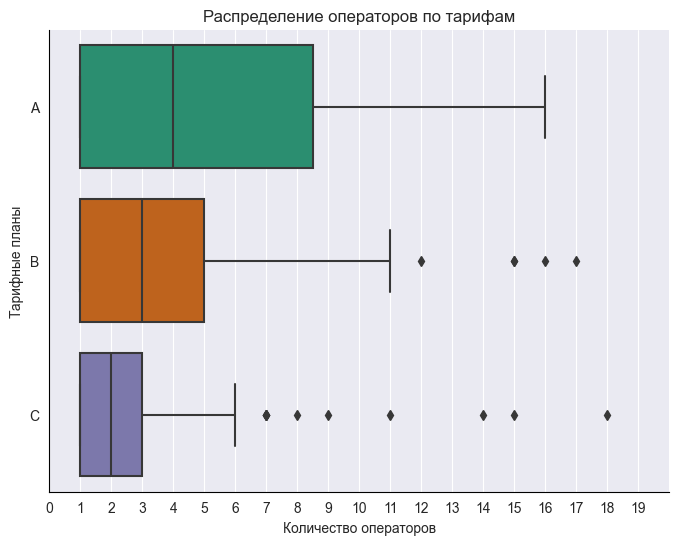

In [45]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=dataset_clients.query('operator_id != 0')
         .groupby(
             ['tariff_plan', 'user_id'],
             as_index=False
         ).agg({'operator_id' : 'nunique'}),
    x='operator_id',
    y='tariff_plan'
)
plt.xlim(0, 20)
plt.xticks(range(0, 20))
sns.despine()
plt.title('Распределение операторов по тарифам')
plt.xlabel('Количество операторов')
plt.ylabel('Тарифные планы')
plt.show()

###### Вывод:

Распределение операторов по тарифам обратно распределению клиентов по тарифам. На самом дорогом тарифе видим наибольшее количество операторов, и наименьшее количество операторов на самом дешевом тарифе. 
Клиенты, использующие самый дорогой тариф А, имеют наибольшее количество операторов - в штате 75% колл-центров состоят до 8,5 операторов;
За ним следует тариф В - в штате 75% колл-центров состоят до 5 операторов;
У клиентов, использующих самый дешевый тариф С, число операторов наименьшее - в штате 75% колл-центров состоят до 3 операторов.

### 5.2. Изучение данных в разрезе времени.

Строим столбчатую диаграмму количества звонков по месяцам:

C:\Users\77281\AppData\Local\Temp\ipykernel_15892\2904151059.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


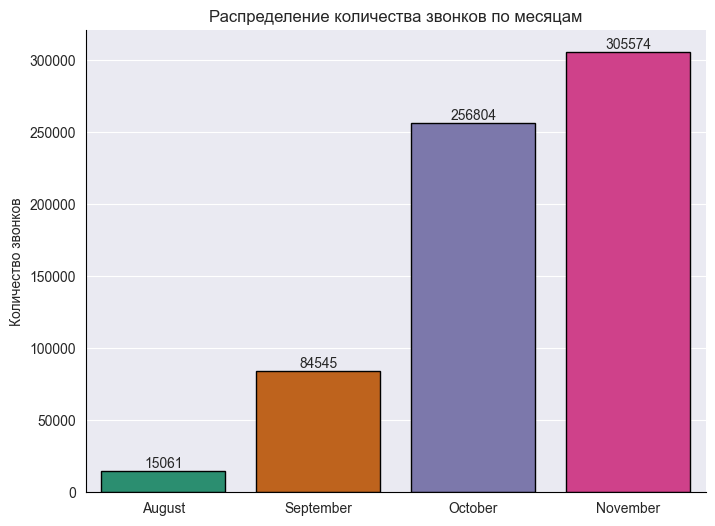

In [46]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=dataset_clients, 
    x='month',
    y='calls_count', 
    estimator=sum, 
    ci=None
)
ax.bar_label(ax.containers[0])
plt.xlabel('')
plt.ylabel('Количество звонков')
plt.title('Распределение количества звонков по месяцам')
sns.despine()
plt.show()

###### Вывод:

Наблюдаем рост количества звонков от месяца к месяцу. Вероятно это связано с ростом общей деловой активности после летнего затишья. При этом наибольшие скачки наблюдаем при сравнении данных за август и  сентябрь, а затем при сравнении данных сентября и октября. При сравнении данных октября и ноября видим, что темп роста уменьшился, деловая активность приближается к своему плато.

Строим столбчатую диаграмму длительности всех звонков по месяцам:

C:\Users\77281\AppData\Local\Temp\ipykernel_15892\1648677299.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


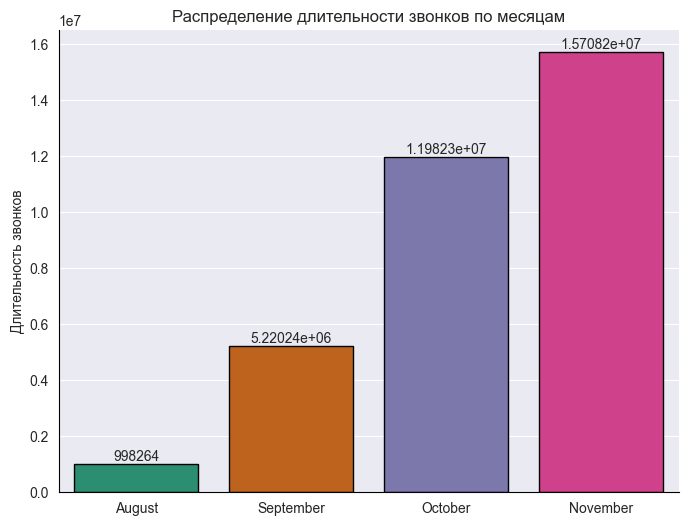

In [47]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=dataset_clients, 
    x='month',
    y='call_duration', 
    estimator=sum, 
    ci=None
)
ax.bar_label(ax.containers[0])
plt.xlabel('')
plt.ylabel('Длительность звонков')
plt.title('Распределение длительности звонков по месяцам')
sns.despine()
plt.show()

###### Вывод:

Распределение длительности звонков по месяцам имеет тот же характер, что мы наблюдали выше при изучении количества звонков по месяцам. Это подтверждает наши выводы об общем росте деловой активности в осенние месяцы.

Строим гистограмму распределения длительности всех звонков с учетом времени ожидания по месяцам:

C:\Users\77281\AppData\Local\Temp\ipykernel_15892\288823043.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


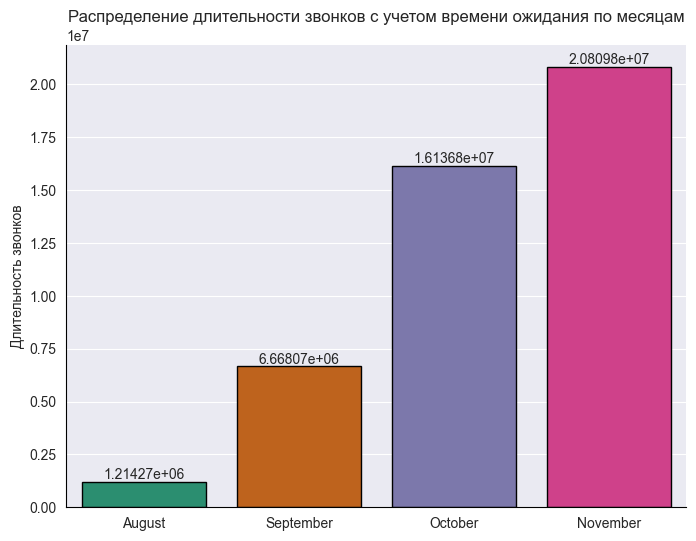

In [48]:

plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=dataset_clients, 
    x='month',
    y='total_call_duration', 
    estimator=sum, 
    ci=None
)
ax.bar_label(ax.containers[0])
plt.xlabel('')
plt.ylabel('Длительность звонков')
plt.title('Распределение длительности звонков с учетом времени ожидания по месяцам')
sns.despine()
plt.show()

###### Вывод:

Никаких аномалий, распределение длительности звонков с учетом времени ожидания имеет тот же характер, что мы наблюдали выше. 

Строим гистограмму распределения по месяцам для клиентов, звонивших хоть раз:

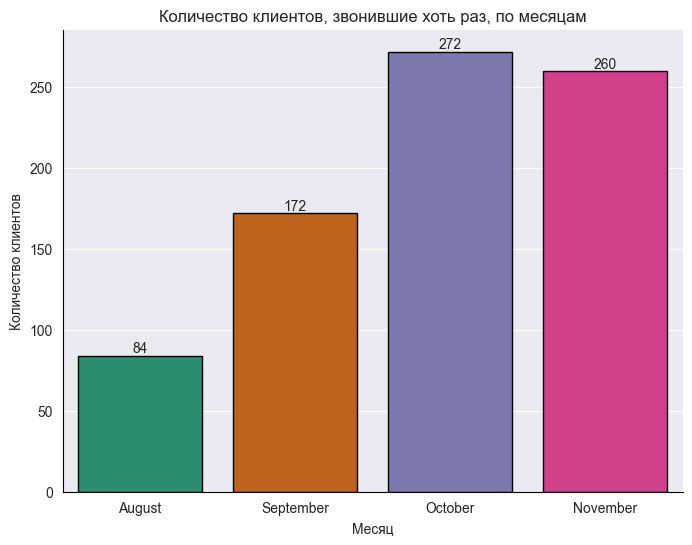

In [56]:
month_order = ['August', 'September', 'October', 'November']
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=dataset_clients
        .groupby('month', as_index=False)
        .agg({'user_id' : 'nunique'}),
    x='month',
    y='user_id', 
    order=month_order
)
ax.bar_label(ax.containers[0])
plt.title('Количество клиентов, звонившие хоть раз, по месяцам')
plt.ylabel('Количество клиентов')
plt.xlabel('Месяц')
sns.despine()
plt.show()

###### Вывод: 

Наблюдаем рост количества клиентов с августа по октябрь, в ноябре незначительный спад по сравнению с октябрем, что подтверждает наше предположение о выходе деловой активности на плато к середине осени.

Построим диаграмму размаха для количества дней, в которые колл-центры совершали звонки, по месяцам:

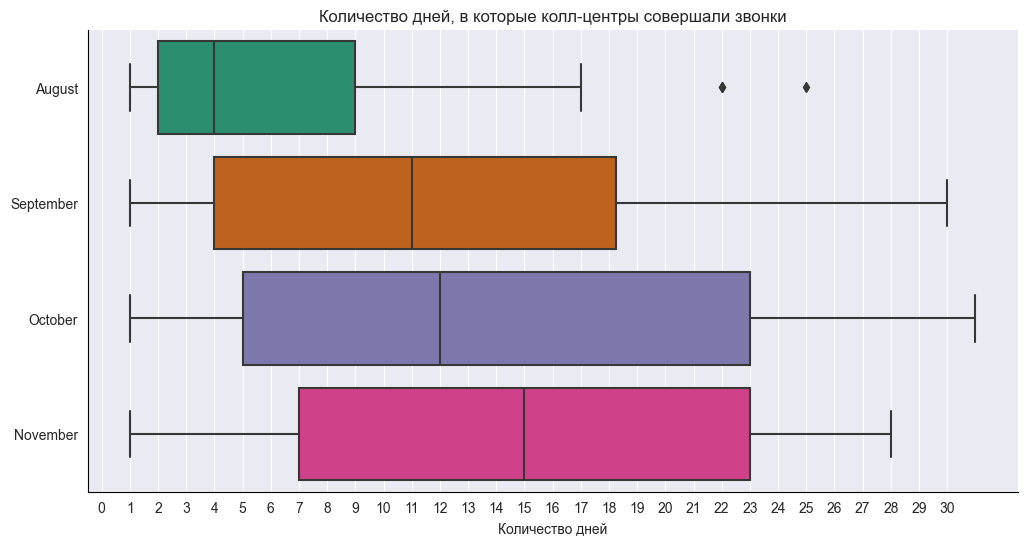

In [57]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=dataset_clients
        .groupby(['user_id', 'month'], as_index=False)
        .agg({'date' : 'nunique'}), 
    y='month', 
    x='date',
    order=month_order
)
plt.title('Количество дней, в которые колл-центры совершали звонки')
plt.xlabel('Количество дней')
plt.ylabel('')
sns.despine()
plt.xticks(range(31))
plt.show()

###### Вывод:  

Снова наблюдаем усиление активности в осенний период.

В августе у 75% колл-центров количество рабочих дней достигало 9, в сентябре тот же показатель вырос до 18, а в октябре и ноябре видим рост до 23;
Так же наблюдаем рост медианного количества рабочих дней, то есть с каждым новым месяцем колл-центры работали больше.

Строим гистограмму распределения количества звонков по дням недели:

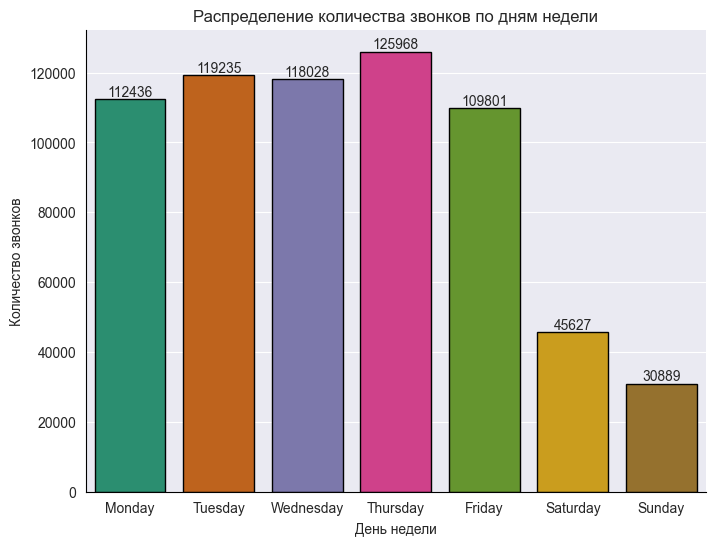

In [58]:
weekdays = ['Monday', 'Tuesday', 
                'Wednesday', 'Thursday', 
                'Friday', 'Saturday',
                'Sunday']

plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=dataset_clients
        .groupby('weekday', as_index=False)
        .agg({'calls_count' : sum}),
    x='weekday',
    y='calls_count', 
    order=weekdays
)
ax.bar_label(ax.containers[0])
plt.title('Распределение количества звонков по дням недели')
plt.ylabel('Количество звонков')
plt.xlabel('День недели')
sns.despine()
plt.show()

###### Вывод:   

Наблюдаем большое различие в количестве звонков в будни по сравнению с выходными днями. При этом количество звонков в субботу составляет примерно треть от показателей будних дней, а в воскресенье звонков еще меньше - около четверти.
С понедельника по пятницу количество звонков различается не сильно, можно выделить лишь небольшое увеличение количества звонков в четверг и небольшое снижение в пятницу.

Cтроим линейный график количества зарегистрированных клиентов по дням с разбивкой по тарифному плану. 
Для этого составляем сводную таблицу и считаем кумулятивную сумму:

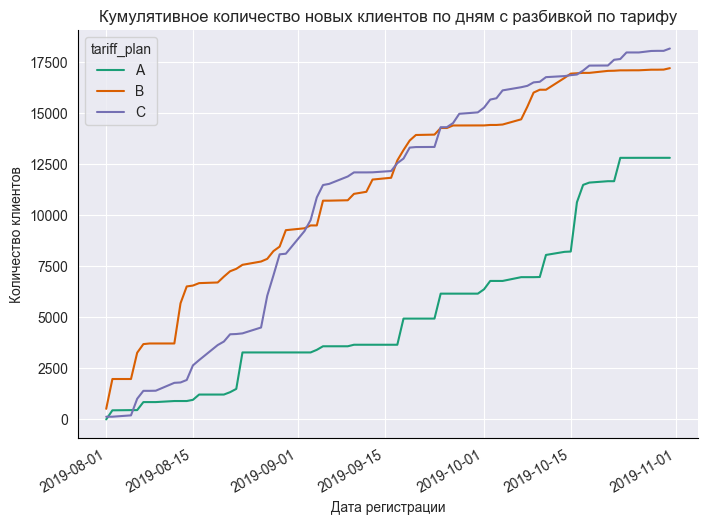

In [59]:
(
    dataset_clients
     .pivot_table(
        index='date_start', 
        columns='tariff_plan',
        values='user_id', 
        aggfunc='count', 
        fill_value=0
    )
     .cumsum()
     .plot(
         figsize=(8, 6), 
         title='Кумулятивное количество новых клиентов по дням с разбивкой по тарифу',
         xlabel='Дата регистрации',
         ylabel='Количество клиентов',
         grid=True
     )
)
sns.despine()
plt.show()

###### Вывод:    

График показывает, что:
- Быстрее всего росло количество клиентов на тарифе C;
- Темп роста количества клиентов на тарифе В в августе был выше, чем у клиентов с тарифом А, в сентябре и октябре темпы роста были примерно одинаковые, а в ноябре темп роста клиентов на тарифе В начал отставать от тарифа А; 
- Медленнее всего идет рост количества клиентов с самым дорогим тарифом А.

### 5.3. Выявляем активных пользователей.

Рассчитываем количество дней активности для каждого клиента по месяцам:

In [49]:
activ_days = (dataset_clients
    .groupby(['user_id', 'month'], as_index=False)
    .agg(activ_days=('date', 'nunique'))
               )

Выявляем активных пользователей, то есть тех, кто отработал минимум 10 дней в ноябре:

In [50]:
activ_days['active'] = activ_days['activ_days'] > 10 
activ_days['active'] = activ_days['month'] == 'November'
activ_days.head()

,user_id,month,activ_days,active
0,166377,August,22,False
1,166377,November,19,True
2,166377,October,25,False
3,166377,September,21,False
4,166391,August,7,False


Добавляем в таблицу dataset столбец с маркером активности:

In [51]:
dataset_clients = dataset_clients.merge(
    activ_days[['user_id', 'month', 'active']],
    on=['user_id', 'month']
)
dataset_clients['active'] = dataset_clients['active'].apply(
    lambda x: 'активный' if x == True else 'неактивный'
)

In [52]:
dataset_clients_activ = dataset_clients.query('active == "активный"')

### 5.4. Считаем общую выручку, т.е. расходы по тарифным планам для всех пользователей.

Расходы клиента состоят из:

ежемесячной платы +
платы за перерасход по внутренним исходящим звонкам, с учетом времени ожидания (total_call_duration) +
платы за внешние исходящие звонки, с учетом времени ожидания (total_call_duration) +
платы за оператора



Считаем для каждого клиента по месяцам количество исходящих секунд и операторов. Затем сохраняем в отдельный датафрейм:

In [53]:
dataset_clients_agg = (
    #  создаем массив клиентов:   
dataset_clients[['user_id','tariff_plan','month']]
    .drop_duplicates()
    #  присоединям внутренние исходящие:
    .merge((dataset_clients
        .query('internal == "внешний" and direction == "исходящий"') 
        .groupby(['user_id', 'month'])
        .agg(
            total_external_secs=('total_call_duration', 'sum')
        )).reset_index(), on = ['user_id', 'month'], how = 'left')
    .merge( # присоединяем такую же сумму по внутренним исходящим звонкам
        (dataset_clients
        .query('internal == "внутренний" and direction == "исходящий"')
        .groupby(['user_id', 'month'])
        .agg(
            total_internal_secs=('total_call_duration', 'sum') 
        )).reset_index(), on = ['user_id', 'month'], how = 'left')
    .fillna(0)
    .merge((dataset_clients.query('operator_id != 0'))
           .groupby(['user_id', 'month'], as_index=False)
       .agg(operator_cnt=('operator_id', 'nunique')),on=['user_id', 'month'], how='left') 
)

Переводим в минуты и округляем в большую сторону:

In [54]:
dataset_clients_agg['total_external_mins'] = np.ceil(dataset_clients_agg['total_external_secs'] / 60)
dataset_clients_agg['total_internal_mins'] = np.ceil(dataset_clients_agg['total_internal_secs'] / 60)
dataset_clients_agg.head()

,user_id,tariff_plan,month,total_external_secs,total_internal_secs,operator_cnt,total_external_mins,total_internal_mins
0,166377,B,August,78029.0,96.0,5.0,1301.0,2.0
1,166377,B,September,105835.0,9.0,4.0,1764.0,1.0
2,166377,B,October,99207.0,5.0,5.0,1654.0,1.0
3,166377,B,November,95384.0,127.0,4.0,1590.0,3.0
4,166391,C,August,0.0,7.0,2.0,0.0,1.0


In [55]:
display(dataset_clients.user_id.nunique())
display(dataset_clients_agg.user_id.nunique())

306

306

Создаем датафрейм с тарифами:

In [56]:
tariffs = pd.DataFrame(
    data={'tariff_plan' : ['A', 'B', 'C'], 
          'monthly' : [4000, 2000, 1000],
          'internal_out' : [0.1 , 0.15 , 0.3], 
          'internal_out_limit' : [2000, 500, 0],
          'external_out' : [0.3, 0.5, 0.7], 
          'operator' : [50, 150, 300]}, 
)

К новому столбцу применим условие с подсчетом минут свыше лимита:

In [57]:
dataset_clients_agg['total_internal_over_limit'] = dataset_clients_agg.apply(lambda x: 0 if x['total_internal_mins']-tariffs[tariffs['tariff_plan'] == x['tariff_plan']]['internal_out_limit'].mean() < 0 else \
                                             x['total_internal_mins']-tariffs[tariffs['tariff_plan'] == x['tariff_plan']]['internal_out_limit'].mean(), axis = 1)
dataset_clients_agg

,user_id,tariff_plan,month,total_external_secs,total_internal_secs,operator_cnt,total_external_mins,total_internal_mins,total_internal_over_limit
0,166377,B,August,78029.0,96.0,5.0,1301.0,2.0,0.0
1,166377,B,September,105835.0,9.0,4.0,1764.0,1.0,0.0
2,166377,B,October,99207.0,5.0,5.0,1654.0,1.0,0.0
3,166377,B,November,95384.0,127.0,4.0,1590.0,3.0,0.0
4,166391,C,August,0.0,7.0,2.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
783,168583,B,November,0.0,0.0,2.0,0.0,0.0,0.0
784,168598,C,November,0.0,0.0,1.0,0.0,0.0,0.0
785,168601,C,November,33192.0,0.0,2.0,554.0,0.0,0.0
786,168603,B,November,1187.0,0.0,1.0,20.0,0.0,0.0


Присоединяем стоимости:

In [58]:
dataset_clients_agg = dataset_clients_agg.merge(tariffs, how='left', on='tariff_plan')
dataset_clients_agg  

,user_id,tariff_plan,month,total_external_secs,total_internal_secs,operator_cnt,total_external_mins,total_internal_mins,total_internal_over_limit,monthly,internal_out,internal_out_limit,external_out,operator
0,166377,B,August,78029.0,96.0,5.0,1301.0,2.0,0.0,2000,0.15,500,0.5,150
1,166377,B,September,105835.0,9.0,4.0,1764.0,1.0,0.0,2000,0.15,500,0.5,150
2,166377,B,October,99207.0,5.0,5.0,1654.0,1.0,0.0,2000,0.15,500,0.5,150
3,166377,B,November,95384.0,127.0,4.0,1590.0,3.0,0.0,2000,0.15,500,0.5,150
4,166391,C,August,0.0,7.0,2.0,0.0,1.0,1.0,1000,0.30,0,0.7,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,168583,B,November,0.0,0.0,2.0,0.0,0.0,0.0,2000,0.15,500,0.5,150
784,168598,C,November,0.0,0.0,1.0,0.0,0.0,0.0,1000,0.30,0,0.7,300
785,168601,C,November,33192.0,0.0,2.0,554.0,0.0,0.0,1000,0.30,0,0.7,300
786,168603,B,November,1187.0,0.0,1.0,20.0,0.0,0.0,2000,0.15,500,0.5,150


Убираем ненужные колонки:

In [59]:
dataset_clients_agg = dataset_clients_agg.drop(columns=['total_external_secs', 'total_internal_secs'])
dataset_clients_agg  

,user_id,tariff_plan,month,operator_cnt,total_external_mins,total_internal_mins,total_internal_over_limit,monthly,internal_out,internal_out_limit,external_out,operator
0,166377,B,August,5.0,1301.0,2.0,0.0,2000,0.15,500,0.5,150
1,166377,B,September,4.0,1764.0,1.0,0.0,2000,0.15,500,0.5,150
2,166377,B,October,5.0,1654.0,1.0,0.0,2000,0.15,500,0.5,150
3,166377,B,November,4.0,1590.0,3.0,0.0,2000,0.15,500,0.5,150
4,166391,C,August,2.0,0.0,1.0,1.0,1000,0.30,0,0.7,300
...,...,...,...,...,...,...,...,...,...,...,...,...
783,168583,B,November,2.0,0.0,0.0,0.0,2000,0.15,500,0.5,150
784,168598,C,November,1.0,0.0,0.0,0.0,1000,0.30,0,0.7,300
785,168601,C,November,2.0,554.0,0.0,0.0,1000,0.30,0,0.7,300
786,168603,B,November,1.0,20.0,0.0,0.0,2000,0.15,500,0.5,150


Считаем расходы:

In [60]:
dataset_clients_agg['current_fee'] = (dataset_clients_agg['monthly'] + 
                              dataset_clients_agg['internal_out'] * dataset_clients_agg['total_internal_over_limit'] + 
                              dataset_clients_agg['external_out'] * dataset_clients_agg['total_external_mins'] + 
                              dataset_clients_agg['operator'] * dataset_clients_agg['operator_cnt']).fillna(0)

In [61]:
dataset_clients_agg

,user_id,tariff_plan,month,operator_cnt,total_external_mins,total_internal_mins,total_internal_over_limit,monthly,internal_out,internal_out_limit,external_out,operator,current_fee
0,166377,B,August,5.0,1301.0,2.0,0.0,2000,0.15,500,0.5,150,3400.5
1,166377,B,September,4.0,1764.0,1.0,0.0,2000,0.15,500,0.5,150,3482.0
2,166377,B,October,5.0,1654.0,1.0,0.0,2000,0.15,500,0.5,150,3577.0
3,166377,B,November,4.0,1590.0,3.0,0.0,2000,0.15,500,0.5,150,3395.0
4,166391,C,August,2.0,0.0,1.0,1.0,1000,0.30,0,0.7,300,1600.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,168583,B,November,2.0,0.0,0.0,0.0,2000,0.15,500,0.5,150,2300.0
784,168598,C,November,1.0,0.0,0.0,0.0,1000,0.30,0,0.7,300,1300.0
785,168601,C,November,2.0,554.0,0.0,0.0,1000,0.30,0,0.7,300,1987.8
786,168603,B,November,1.0,20.0,0.0,0.0,2000,0.15,500,0.5,150,2160.0


Считаем общую выручку:

In [62]:
total_revenue = dataset_clients_agg['current_fee'].sum().round()
total_revenue

1808828.0

Общая выручка компании за изучаемый период составляет 1.808.828 рублей.

### 5.5. Выявим активных клиентов, то есть тех, кто отработал минимум 10 дней в ноябре. Среди активных клиентов найдем тех, кто переплачивает за услуги телеком-компании на текущем тарифе.

In [63]:
dataset_clients_activ_agg = dataset_clients_agg.query('user_id in @dataset_clients_activ.user_id.unique()')
dataset_clients_activ_agg

,user_id,tariff_plan,month,operator_cnt,total_external_mins,total_internal_mins,total_internal_over_limit,monthly,internal_out,internal_out_limit,external_out,operator,current_fee
0,166377,B,August,5.0,1301.0,2.0,0.0,2000,0.15,500,0.5,150,3400.5
1,166377,B,September,4.0,1764.0,1.0,0.0,2000,0.15,500,0.5,150,3482.0
2,166377,B,October,5.0,1654.0,1.0,0.0,2000,0.15,500,0.5,150,3577.0
3,166377,B,November,4.0,1590.0,3.0,0.0,2000,0.15,500,0.5,150,3395.0
4,166391,C,August,2.0,0.0,1.0,1.0,1000,0.30,0,0.7,300,1600.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,168583,B,November,2.0,0.0,0.0,0.0,2000,0.15,500,0.5,150,2300.0
784,168598,C,November,1.0,0.0,0.0,0.0,1000,0.30,0,0.7,300,1300.0
785,168601,C,November,2.0,554.0,0.0,0.0,1000,0.30,0,0.7,300,1987.8
786,168603,B,November,1.0,20.0,0.0,0.0,2000,0.15,500,0.5,150,2160.0


Считаем расходы по всем возможным тарифам:

In [64]:
dataset_clients_activ_agg['A'] = (tariffs.loc[0, 'monthly'] + \
                              tariffs.loc[0, 'internal_out'] * dataset_clients_activ_agg['total_internal_over_limit'] + \
                              tariffs.loc[0, 'external_out'] * dataset_clients_activ_agg['total_external_mins'] + \
                              tariffs.loc[0, 'operator'] * dataset_clients_activ_agg['operator_cnt']).fillna(0)

dataset_clients_activ_agg['B'] = (tariffs.loc[1, 'monthly'] + \
                              tariffs.loc[1, 'internal_out'] * dataset_clients_activ_agg['total_internal_over_limit'] + \
                              tariffs.loc[1, 'external_out'] * dataset_clients_activ_agg['total_external_mins'] + \
                              tariffs.loc[1, 'operator'] * dataset_clients_activ_agg['operator_cnt']).fillna(0)

dataset_clients_activ_agg['C'] = (tariffs.loc[2, 'monthly'] + \
                              tariffs.loc[2, 'external_out'] * dataset_clients_activ_agg['total_external_mins'] + \
                              tariffs.loc[2, 'operator'] * dataset_clients_activ_agg['operator_cnt']).fillna(0)

C:\Users\77281\AppData\Local\Temp\ipykernel_15892\2658643137.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clients_activ_agg['A'] = (tariffs.loc[0, 'monthly'] + \
C:\Users\77281\AppData\Local\Temp\ipykernel_15892\2658643137.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clients_activ_agg['B'] = (tariffs.loc[1, 'monthly'] + \
C:\Users\77281\AppData\Local\Temp\ipykernel_15892\2658643137.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Определяем выгодный тариф:

In [65]:
dataset_clients_activ_agg['opt_tariff'] = dataset_clients_activ_agg[['A', 'B', 'C']].idxmin(axis=1)
dataset_clients_activ_agg

C:\Users\77281\AppData\Local\Temp\ipykernel_15892\2980653411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clients_activ_agg['opt_tariff'] = dataset_clients_activ_agg[['A', 'B', 'C']].idxmin(axis=1)


,user_id,tariff_plan,month,operator_cnt,total_external_mins,total_internal_mins,total_internal_over_limit,monthly,internal_out,internal_out_limit,external_out,operator,current_fee,A,B,C,opt_tariff
0,166377,B,August,5.0,1301.0,2.0,0.0,2000,0.15,500,0.5,150,3400.5,4640.3,3400.50,3410.7,B
1,166377,B,September,4.0,1764.0,1.0,0.0,2000,0.15,500,0.5,150,3482.0,4729.2,3482.00,3434.8,C
2,166377,B,October,5.0,1654.0,1.0,0.0,2000,0.15,500,0.5,150,3577.0,4746.2,3577.00,3657.8,B
3,166377,B,November,4.0,1590.0,3.0,0.0,2000,0.15,500,0.5,150,3395.0,4677.0,3395.00,3313.0,C
4,166391,C,August,2.0,0.0,1.0,1.0,1000,0.30,0,0.7,300,1600.3,4100.1,2300.15,1600.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,168583,B,November,2.0,0.0,0.0,0.0,2000,0.15,500,0.5,150,2300.0,4100.0,2300.00,1600.0,C
784,168598,C,November,1.0,0.0,0.0,0.0,1000,0.30,0,0.7,300,1300.0,4050.0,2150.00,1300.0,C
785,168601,C,November,2.0,554.0,0.0,0.0,1000,0.30,0,0.7,300,1987.8,4266.2,2577.00,1987.8,C
786,168603,B,November,1.0,20.0,0.0,0.0,2000,0.15,500,0.5,150,2160.0,4056.0,2160.00,1314.0,C


Расчитываем затраты на оптимальном тарифе:

In [66]:
def def_hypothetic(row):
    if row['opt_tariff'] == 'A':
        return row['A']
    if row['opt_tariff'] == 'B':
        return row['B']
    if row['opt_tariff'] == 'C':    
        return row['C']

dataset_clients_activ_agg['opt_fee'] = dataset_clients_activ_agg.apply(def_hypothetic, axis = 1)
dataset_clients_activ_agg

C:\Users\77281\AppData\Local\Temp\ipykernel_15892\1982608042.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clients_activ_agg['opt_fee'] = dataset_clients_activ_agg.apply(def_hypothetic, axis = 1)


,user_id,tariff_plan,month,operator_cnt,total_external_mins,total_internal_mins,total_internal_over_limit,monthly,internal_out,internal_out_limit,external_out,operator,current_fee,A,B,C,opt_tariff,opt_fee
0,166377,B,August,5.0,1301.0,2.0,0.0,2000,0.15,500,0.5,150,3400.5,4640.3,3400.50,3410.7,B,3400.5
1,166377,B,September,4.0,1764.0,1.0,0.0,2000,0.15,500,0.5,150,3482.0,4729.2,3482.00,3434.8,C,3434.8
2,166377,B,October,5.0,1654.0,1.0,0.0,2000,0.15,500,0.5,150,3577.0,4746.2,3577.00,3657.8,B,3577.0
3,166377,B,November,4.0,1590.0,3.0,0.0,2000,0.15,500,0.5,150,3395.0,4677.0,3395.00,3313.0,C,3313.0
4,166391,C,August,2.0,0.0,1.0,1.0,1000,0.30,0,0.7,300,1600.3,4100.1,2300.15,1600.0,C,1600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,168583,B,November,2.0,0.0,0.0,0.0,2000,0.15,500,0.5,150,2300.0,4100.0,2300.00,1600.0,C,1600.0
784,168598,C,November,1.0,0.0,0.0,0.0,1000,0.30,0,0.7,300,1300.0,4050.0,2150.00,1300.0,C,1300.0
785,168601,C,November,2.0,554.0,0.0,0.0,1000,0.30,0,0.7,300,1987.8,4266.2,2577.00,1987.8,C,1987.8
786,168603,B,November,1.0,20.0,0.0,0.0,2000,0.15,500,0.5,150,2160.0,4056.0,2160.00,1314.0,C,1314.0


Расчитываем переплаты на текущем тарифе по сравнению с оптимальным:

In [67]:
dataset_clients_activ_agg['overpayment'] = dataset_clients_activ_agg['current_fee'] - dataset_clients_activ_agg['opt_fee']
dataset_clients_activ_agg

C:\Users\77281\AppData\Local\Temp\ipykernel_15892\1274106127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clients_activ_agg['overpayment'] = dataset_clients_activ_agg['current_fee'] - dataset_clients_activ_agg['opt_fee']


,user_id,tariff_plan,month,operator_cnt,total_external_mins,total_internal_mins,total_internal_over_limit,monthly,internal_out,internal_out_limit,external_out,operator,current_fee,A,B,C,opt_tariff,opt_fee,overpayment
0,166377,B,August,5.0,1301.0,2.0,0.0,2000,0.15,500,0.5,150,3400.5,4640.3,3400.50,3410.7,B,3400.5,0.0
1,166377,B,September,4.0,1764.0,1.0,0.0,2000,0.15,500,0.5,150,3482.0,4729.2,3482.00,3434.8,C,3434.8,47.2
2,166377,B,October,5.0,1654.0,1.0,0.0,2000,0.15,500,0.5,150,3577.0,4746.2,3577.00,3657.8,B,3577.0,0.0
3,166377,B,November,4.0,1590.0,3.0,0.0,2000,0.15,500,0.5,150,3395.0,4677.0,3395.00,3313.0,C,3313.0,82.0
4,166391,C,August,2.0,0.0,1.0,1.0,1000,0.30,0,0.7,300,1600.3,4100.1,2300.15,1600.0,C,1600.0,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,168583,B,November,2.0,0.0,0.0,0.0,2000,0.15,500,0.5,150,2300.0,4100.0,2300.00,1600.0,C,1600.0,700.0
784,168598,C,November,1.0,0.0,0.0,0.0,1000,0.30,0,0.7,300,1300.0,4050.0,2150.00,1300.0,C,1300.0,0.0
785,168601,C,November,2.0,554.0,0.0,0.0,1000,0.30,0,0.7,300,1987.8,4266.2,2577.00,1987.8,C,1987.8,0.0
786,168603,B,November,1.0,20.0,0.0,0.0,2000,0.15,500,0.5,150,2160.0,4056.0,2160.00,1314.0,C,1314.0,846.0


Расчитываем переплаты в процентах:

In [68]:
dataset_clients_activ_agg['%overpayment'] = (dataset_clients_activ_agg['overpayment'] / dataset_clients_activ_agg['opt_fee'] * 100).round(1)
dataset_clients_activ_agg

C:\Users\77281\AppData\Local\Temp\ipykernel_15892\2147815797.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clients_activ_agg['%overpayment'] = (dataset_clients_activ_agg['overpayment'] / dataset_clients_activ_agg['opt_fee'] * 100).round(1)


,user_id,tariff_plan,month,operator_cnt,total_external_mins,total_internal_mins,total_internal_over_limit,monthly,internal_out,internal_out_limit,external_out,operator,current_fee,A,B,C,opt_tariff,opt_fee,overpayment,%overpayment
0,166377,B,August,5.0,1301.0,2.0,0.0,2000,0.15,500,0.5,150,3400.5,4640.3,3400.50,3410.7,B,3400.5,0.0,0.0
1,166377,B,September,4.0,1764.0,1.0,0.0,2000,0.15,500,0.5,150,3482.0,4729.2,3482.00,3434.8,C,3434.8,47.2,1.4
2,166377,B,October,5.0,1654.0,1.0,0.0,2000,0.15,500,0.5,150,3577.0,4746.2,3577.00,3657.8,B,3577.0,0.0,0.0
3,166377,B,November,4.0,1590.0,3.0,0.0,2000,0.15,500,0.5,150,3395.0,4677.0,3395.00,3313.0,C,3313.0,82.0,2.5
4,166391,C,August,2.0,0.0,1.0,1.0,1000,0.30,0,0.7,300,1600.3,4100.1,2300.15,1600.0,C,1600.0,0.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,168583,B,November,2.0,0.0,0.0,0.0,2000,0.15,500,0.5,150,2300.0,4100.0,2300.00,1600.0,C,1600.0,700.0,43.8
784,168598,C,November,1.0,0.0,0.0,0.0,1000,0.30,0,0.7,300,1300.0,4050.0,2150.00,1300.0,C,1300.0,0.0,0.0
785,168601,C,November,2.0,554.0,0.0,0.0,1000,0.30,0,0.7,300,1987.8,4266.2,2577.00,1987.8,C,1987.8,0.0,0.0
786,168603,B,November,1.0,20.0,0.0,0.0,2000,0.15,500,0.5,150,2160.0,4056.0,2160.00,1314.0,C,1314.0,846.0,64.4


### Посчитаем сколько именно переплачивают клиенты.

Сумма переплаты:

In [69]:
dataset_clients_activ_agg['overpayment'].sum().round()

282216.0

### 5.6. Посчитаем общую выручку телеком-компании (расходы по тарифным планам для всех пользователей) после оптимизации тарифов активных пользователей и сравним ее с общей выручкой до оптимизации тарифов.

Получим данные для неактивных клиентов:

In [70]:
dataset_clients_not_activ_agg = dataset_clients_agg.query('user_id not in @dataset_clients_activ.user_id.unique()')
dataset_clients_not_activ_agg

,user_id,tariff_plan,month,operator_cnt,total_external_mins,total_internal_mins,total_internal_over_limit,monthly,internal_out,internal_out_limit,external_out,operator,current_fee
12,166399,C,August,1.0,0.0,0.0,0.0,1000,0.30,0,0.7,300,1300.0
13,166399,C,September,1.0,0.0,0.0,0.0,1000,0.30,0,0.7,300,1300.0
14,166399,C,October,1.0,0.0,0.0,0.0,1000,0.30,0,0.7,300,1300.0
31,166481,A,August,1.0,0.0,0.0,0.0,4000,0.10,2000,0.3,50,4050.0
32,166481,A,September,NaN,0.0,0.0,0.0,4000,0.10,2000,0.3,50,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,167939,B,October,NaN,0.0,0.0,0.0,2000,0.15,500,0.5,150,0.0
665,168013,C,October,NaN,0.0,0.0,0.0,1000,0.30,0,0.7,300,0.0
676,168025,B,October,7.0,4897.0,0.0,0.0,2000,0.15,500,0.5,150,5498.5
696,168093,C,October,1.0,194.0,0.0,0.0,1000,0.30,0,0.7,300,1435.8


Расчет выручки для неактивных пользователей:

In [71]:
total_revenue_not_activ = dataset_clients_not_activ_agg['current_fee'].sum()
total_revenue_not_activ.round()

186338.0

Выручка компании по неактивным клиентам за четыре месяца составляет 186338.0 рублей.


Расчет выручки для активных пользователей при условии их перевода на оптимальный тариф:

In [72]:
total_revenue_activ_opt = dataset_clients_activ_agg['opt_fee'].sum()
total_revenue_activ_opt.round()

1340274.0

Выручка компании по активным клиентам при условии их перевода на оптимальный тариф за четыре месяца составит 1340274.0 рублей.

Расчет выручки для всех пользователей при условии перевода на оптимальный тариф всех активных клиентов за четыре месяца :

In [73]:
total_revenue_opt = total_revenue_not_activ + total_revenue_activ_opt
total_revenue_opt.round()

1526612.0

Выручка по всем пользователям при условии перевода на оптимальный тариф всех активных клиентов за четыре месяца составит 1526612.0 рублей.

Расчет падения выручки компании при условии перевода на оптимальный тариф всех активных клиентов за четыре месяца :

In [74]:
delta_opt = total_revenue - total_revenue_opt
delta_opt.round()

282216.0

Расчет падения выручки в процентах:

In [75]:
share_delta_opt = ((total_revenue - total_revenue_opt)/total_revenue*100).round(1)
share_delta_opt

15.6

Падение выручки по всем пользователям при условии перевода на оптимальный тариф всех активных клиентов за четыре месяца составит  282216.0 рублей или 15,6%.

### 5.7. Рассмотрим детально выручку по всем выявленным клиентам, найдем группы клиентов, которые приносят максимальный доход телеком-компании, и какие минимальный.

#### Анализ выручки по неактивным клиентам.

C:\Users\77281\AppData\Local\Temp\ipykernel_15892\3008412716.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax_revenue_not_activ = sns.barplot(x='month', y='current_fee', data=revenue_not_activ, hue='tariff_plan', estimator=sum, ci=None, order=month_order)


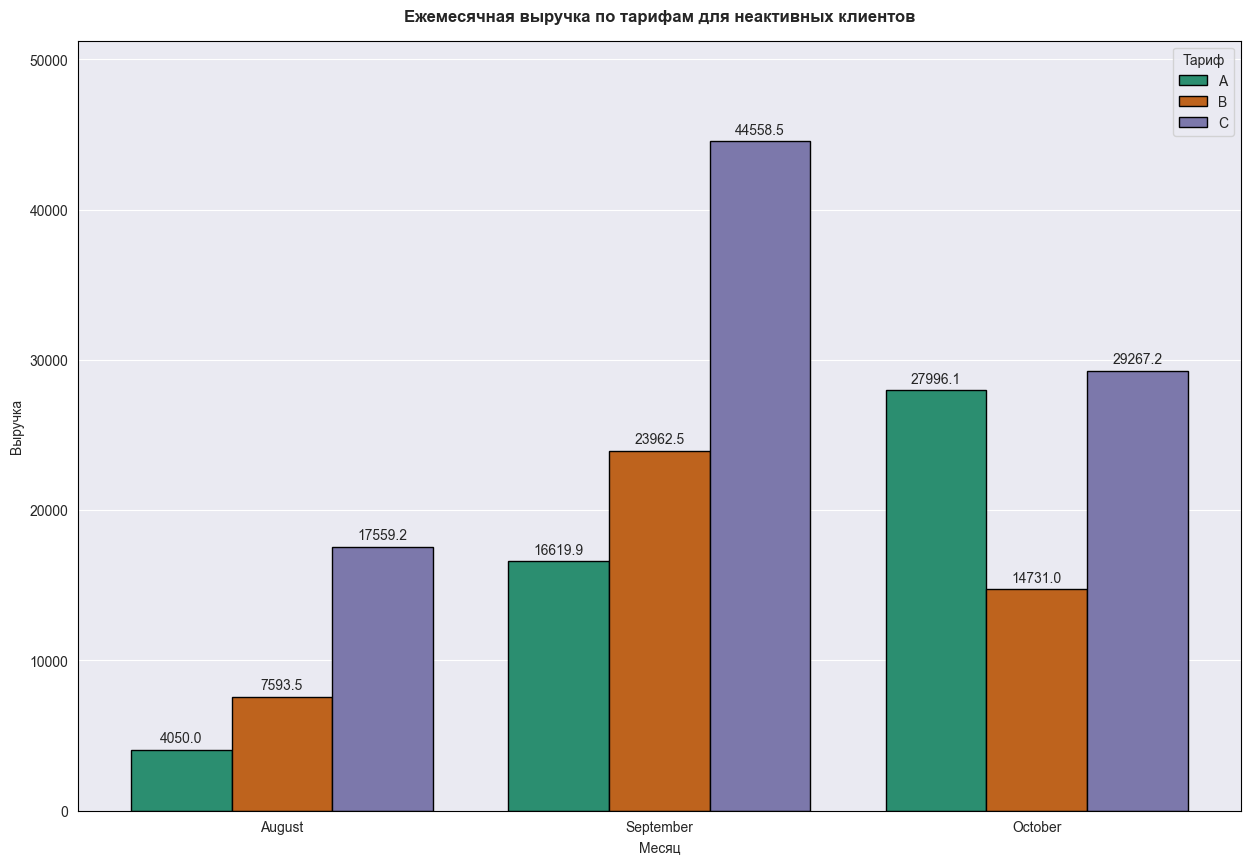

In [76]:
month_order = ['August', 'September', 'October', 'November']
revenue_not_activ = pd.pivot_table(dataset_clients_not_activ_agg, index=['month', 'tariff_plan'],  
                       aggfunc={'current_fee': 'sum'}).reset_index()
fig=plt.figure(figsize=(15,10))
ax_revenue_not_activ = sns.barplot(x='month', y='current_fee', data=revenue_not_activ, hue='tariff_plan', estimator=sum, ci=None, order=month_order) 
ax_revenue_not_activ.margins(0.05, 0.15)

plt.title('Ежемесячная выручка по тарифам для неактивных клиентов', fontweight='bold', pad=14) 
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.legend(title='Тариф')

for c in ax_revenue_not_activ.containers:
    labels = [f'{v.get_height():.1f}' for v in c]
    ax_revenue_not_activ.bar_label(c, labels=labels, label_type='edge', padding=3)
plt.show()

Для неактивных клиентов наблюдаем рост выручки с августа по сентябрь для клиентов всех тарифов, и падение выручки в ноябре для клиентов тарифов В и С. Для клиентов тарифа А наблюдаем стабильный рост выручки так же и в ноябре месяце. 

#### Анализ выручки по активным клиентам.

C:\Users\77281\AppData\Local\Temp\ipykernel_15892\3060480749.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax_revenue_activ = sns.barplot(x='month', y='current_fee', data=revenue_activ, hue='tariff_plan', estimator=sum, ci=None, order=month_order)


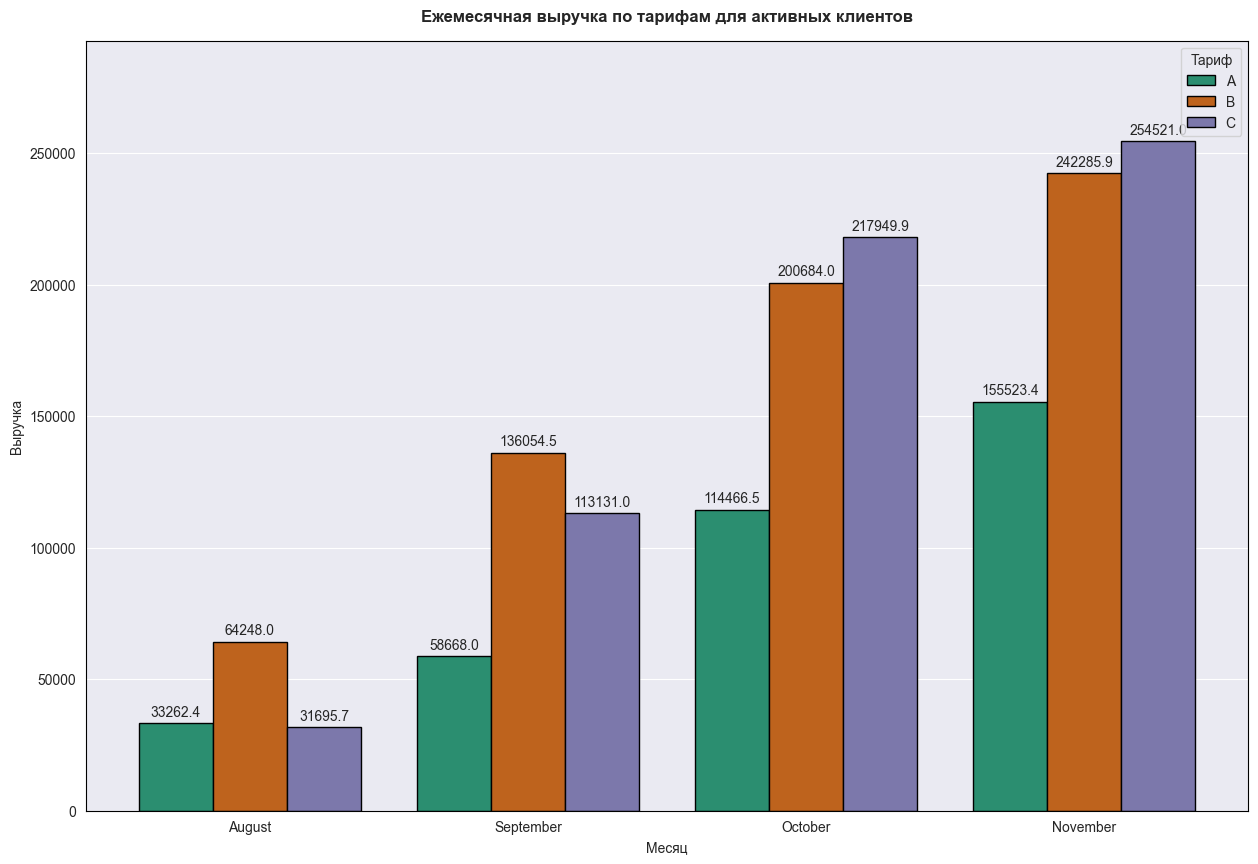

In [77]:
month_order = ['August', 'September', 'October', 'November']
revenue_activ = pd.pivot_table(dataset_clients_activ_agg, index=['month', 'tariff_plan'],  
                       aggfunc={'current_fee': 'sum'}).reset_index()
fig=plt.figure(figsize=(15,10))
ax_revenue_activ = sns.barplot(x='month', y='current_fee', data=revenue_activ, hue='tariff_plan', estimator=sum, ci=None, order=month_order) 
ax_revenue_activ.margins(0.05, 0.15)
plt.title('Ежемесячная выручка по тарифам для активных клиентов', fontweight='bold', pad=14) 
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.legend(title='Тариф')    
for c in ax_revenue_activ.containers:
    labels = [f'{v.get_height():.1f}' for v in c]
    ax_revenue_activ.bar_label(c, labels=labels, label_type='edge', padding=3)
plt.show()

Для активных клиентов наблюдаем стабильный рост выручки в течении всего наблюдаемого периода. Также видим, в августе и в сентябре самую большую выручку приносили клиенты тарифа В, а в октябре и ноябре наибольшую выручку принесли клиенты тарифа С.

#### Анализ неактивных клиентов по тарифам.

In [78]:
dataset_clients_not_activ_agg.groupby('tariff_plan')[['current_fee']].describe().fillna('')

current_fee                                                 \
                  count         mean          std  min     25%     50%   
tariff_plan                                                              
A                   8.0  6083.250000  7667.852718  0.0     0.0  4058.7   
B                  24.0  1928.625000  1317.068354  0.0  1612.5  2224.5   
C                  53.0  1724.243396  1931.350910  0.0  1300.0  1301.7   

                               
                 75%      max  
tariff_plan                    
A            7702.25  21910.6  
B            2486.75   5498.5  
C            1601.40  10481.0

Рассмотрим распределение неактивных клиентов по тарифам в процентах :

In [79]:
not_activ = dataset_clients_not_activ_agg.groupby(['tariff_plan']).agg({'user_id': 'count'})

In [80]:
all_clients = dataset_clients_agg.groupby(['tariff_plan']).agg({'user_id': 'nunique'})

In [81]:
not_activ_share = not_activ.merge(all_clients, on='tariff_plan', how='left')
not_activ_share.columns = ['not_activ', 'all']
not_activ_share['not_activ_share'] = (not_activ_share['not_activ'] * 100 / not_activ_share['all']).round(1)
not_activ_share

,not_activ,all,not_activ_share
tariff_plan,,,
A,8,33,24.2
B,24,112,21.4
C,53,161,32.9


Доля клиентов, которые перестали пользоваться услугами компании, составила для тарифа "А" 24,2%, тарифа "В" - 21,4% и тарифа "С" - 32,9%.

Определим сколько клиентов из неактивных пользовались неэффективными тарифами.
Считаем расходы по всем возможным тарифам::

In [82]:

dataset_clients_not_activ_agg['A'] = (tariffs.loc[0, 'monthly'] + \
                              tariffs.loc[0, 'internal_out'] * dataset_clients_not_activ_agg['total_internal_over_limit'] + \
                              tariffs.loc[0, 'external_out'] * dataset_clients_not_activ_agg['total_external_mins'] + \
                              tariffs.loc[0, 'operator'] * dataset_clients_not_activ_agg['operator_cnt']).fillna(0)

dataset_clients_not_activ_agg['B'] = (tariffs.loc[1, 'monthly'] + \
                              tariffs.loc[1, 'internal_out'] * dataset_clients_not_activ_agg['total_internal_over_limit'] + \
                              tariffs.loc[1, 'external_out'] * dataset_clients_not_activ_agg['total_external_mins'] + \
                              tariffs.loc[1, 'operator'] * dataset_clients_not_activ_agg['operator_cnt']).fillna(0)

dataset_clients_not_activ_agg['C'] = (tariffs.loc[2, 'monthly'] + \
                              tariffs.loc[2, 'external_out'] * dataset_clients_not_activ_agg['total_external_mins'] + \
                              tariffs.loc[2, 'operator'] * dataset_clients_not_activ_agg['operator_cnt']).fillna(0)

dataset_clients_not_activ_agg

C:\Users\77281\AppData\Local\Temp\ipykernel_15892\449932311.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clients_not_activ_agg['A'] = (tariffs.loc[0, 'monthly'] + \
C:\Users\77281\AppData\Local\Temp\ipykernel_15892\449932311.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clients_not_activ_agg['B'] = (tariffs.loc[1, 'monthly'] + \
C:\Users\77281\AppData\Local\Temp\ipykernel_15892\449932311.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

,user_id,tariff_plan,month,operator_cnt,total_external_mins,total_internal_mins,total_internal_over_limit,monthly,internal_out,internal_out_limit,external_out,operator,current_fee,A,B,C
12,166399,C,August,1.0,0.0,0.0,0.0,1000,0.30,0,0.7,300,1300.0,4050.0,2150.0,1300.0
13,166399,C,September,1.0,0.0,0.0,0.0,1000,0.30,0,0.7,300,1300.0,4050.0,2150.0,1300.0
14,166399,C,October,1.0,0.0,0.0,0.0,1000,0.30,0,0.7,300,1300.0,4050.0,2150.0,1300.0
31,166481,A,August,1.0,0.0,0.0,0.0,4000,0.10,2000,0.3,50,4050.0,4050.0,2150.0,1300.0
32,166481,A,September,NaN,0.0,0.0,0.0,4000,0.10,2000,0.3,50,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,167939,B,October,NaN,0.0,0.0,0.0,2000,0.15,500,0.5,150,0.0,0.0,0.0,0.0
665,168013,C,October,NaN,0.0,0.0,0.0,1000,0.30,0,0.7,300,0.0,0.0,0.0,0.0
676,168025,B,October,7.0,4897.0,0.0,0.0,2000,0.15,500,0.5,150,5498.5,5819.1,5498.5,6527.9
696,168093,C,October,1.0,194.0,0.0,0.0,1000,0.30,0,0.7,300,1435.8,4108.2,2247.0,1435.8


Определение выгодного тарифа:

In [83]:
dataset_clients_not_activ_agg['opt_tariff'] = dataset_clients_not_activ_agg[['A', 'B', 'C']].idxmin(axis=1)

C:\Users\77281\AppData\Local\Temp\ipykernel_15892\1943503051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clients_not_activ_agg['opt_tariff'] = dataset_clients_not_activ_agg[['A', 'B', 'C']].idxmin(axis=1)


Расчет затрат на оптимальном тарифе:

In [84]:
def def_hypothetic(row):
    if row['opt_tariff'] == 'A':
        return row['A']
    if row['opt_tariff'] == 'B':
        return row['B']
    if row['opt_tariff'] == 'C':    
        return row['C']

dataset_clients_not_activ_agg['opt_fee'] = dataset_clients_not_activ_agg.apply(def_hypothetic, axis = 1)

C:\Users\77281\AppData\Local\Temp\ipykernel_15892\4030659040.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clients_not_activ_agg['opt_fee'] = dataset_clients_not_activ_agg.apply(def_hypothetic, axis = 1)


In [85]:
not_activ_wrong_tariff = (dataset_clients_not_activ_agg[dataset_clients_not_activ_agg['tariff_plan'] != dataset_clients_not_activ_agg['opt_tariff']])\
.reset_index(drop=True)
print('Среди неактивных клиентов доля использующих неэффективный тариф:', '- {:.1%}'.format(len(not_activ_wrong_tariff) / len(dataset_clients_not_activ_agg)))

Среди неактивных клиентов доля использующих неэффективный тариф: - 44.7%


Неэффективный тариф использовали менее половины неактивных клиентов.

Расчет переплаты на текущем тарифе по сравнению с оптимальным:

In [86]:
dataset_clients_not_activ_agg['overpayment'] = dataset_clients_not_activ_agg['current_fee'] - dataset_clients_not_activ_agg['opt_fee']
dataset_clients_not_activ_agg

C:\Users\77281\AppData\Local\Temp\ipykernel_15892\1414880348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clients_not_activ_agg['overpayment'] = dataset_clients_not_activ_agg['current_fee'] - dataset_clients_not_activ_agg['opt_fee']


,user_id,tariff_plan,month,operator_cnt,total_external_mins,total_internal_mins,total_internal_over_limit,monthly,internal_out,internal_out_limit,external_out,operator,current_fee,A,B,C,opt_tariff,opt_fee,overpayment
12,166399,C,August,1.0,0.0,0.0,0.0,1000,0.30,0,0.7,300,1300.0,4050.0,2150.0,1300.0,C,1300.0,0.0
13,166399,C,September,1.0,0.0,0.0,0.0,1000,0.30,0,0.7,300,1300.0,4050.0,2150.0,1300.0,C,1300.0,0.0
14,166399,C,October,1.0,0.0,0.0,0.0,1000,0.30,0,0.7,300,1300.0,4050.0,2150.0,1300.0,C,1300.0,0.0
31,166481,A,August,1.0,0.0,0.0,0.0,4000,0.10,2000,0.3,50,4050.0,4050.0,2150.0,1300.0,C,1300.0,2750.0
32,166481,A,September,NaN,0.0,0.0,0.0,4000,0.10,2000,0.3,50,0.0,0.0,0.0,0.0,A,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,167939,B,October,NaN,0.0,0.0,0.0,2000,0.15,500,0.5,150,0.0,0.0,0.0,0.0,A,0.0,0.0
665,168013,C,October,NaN,0.0,0.0,0.0,1000,0.30,0,0.7,300,0.0,0.0,0.0,0.0,A,0.0,0.0
676,168025,B,October,7.0,4897.0,0.0,0.0,2000,0.15,500,0.5,150,5498.5,5819.1,5498.5,6527.9,B,5498.5,0.0
696,168093,C,October,1.0,194.0,0.0,0.0,1000,0.30,0,0.7,300,1435.8,4108.2,2247.0,1435.8,C,1435.8,0.0


Определим, какие тарифы являлись для клиентов оптимальными.
Расчет переплаты в процентах:

In [87]:
dataset_clients_not_activ_agg['%overpayment'] = (dataset_clients_not_activ_agg['overpayment'] / dataset_clients_not_activ_agg['opt_fee'] * 100).round(1)
dataset_clients_not_activ_agg

C:\Users\77281\AppData\Local\Temp\ipykernel_15892\1714989320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clients_not_activ_agg['%overpayment'] = (dataset_clients_not_activ_agg['overpayment'] / dataset_clients_not_activ_agg['opt_fee'] * 100).round(1)


,user_id,tariff_plan,month,operator_cnt,total_external_mins,total_internal_mins,total_internal_over_limit,monthly,internal_out,internal_out_limit,external_out,operator,current_fee,A,B,C,opt_tariff,opt_fee,overpayment,%overpayment
12,166399,C,August,1.0,0.0,0.0,0.0,1000,0.30,0,0.7,300,1300.0,4050.0,2150.0,1300.0,C,1300.0,0.0,0.0
13,166399,C,September,1.0,0.0,0.0,0.0,1000,0.30,0,0.7,300,1300.0,4050.0,2150.0,1300.0,C,1300.0,0.0,0.0
14,166399,C,October,1.0,0.0,0.0,0.0,1000,0.30,0,0.7,300,1300.0,4050.0,2150.0,1300.0,C,1300.0,0.0,0.0
31,166481,A,August,1.0,0.0,0.0,0.0,4000,0.10,2000,0.3,50,4050.0,4050.0,2150.0,1300.0,C,1300.0,2750.0,211.5
32,166481,A,September,NaN,0.0,0.0,0.0,4000,0.10,2000,0.3,50,0.0,0.0,0.0,0.0,A,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,167939,B,October,NaN,0.0,0.0,0.0,2000,0.15,500,0.5,150,0.0,0.0,0.0,0.0,A,0.0,0.0,NaN
665,168013,C,October,NaN,0.0,0.0,0.0,1000,0.30,0,0.7,300,0.0,0.0,0.0,0.0,A,0.0,0.0,NaN
676,168025,B,October,7.0,4897.0,0.0,0.0,2000,0.15,500,0.5,150,5498.5,5819.1,5498.5,6527.9,B,5498.5,0.0,0.0
696,168093,C,October,1.0,194.0,0.0,0.0,1000,0.30,0,0.7,300,1435.8,4108.2,2247.0,1435.8,C,1435.8,0.0,0.0


In [88]:
dataset_clients_not_activ_agg.groupby(['tariff_plan', 'opt_tariff']).agg({'user_id': 'count'})

user_id
tariff_plan opt_tariff         
A           A                 5
            B                 1
            C                 2
B           A                 6
            B                 1
            C                17
C           A                10
            B                 2
            C                41

Выявили 5 случаев использования оптимальных тарифов для клиентов с тарифом "А", 1 случай для клиента с тарифом "В" и 41 случай для клиента с тарифом "С". В 2-х случаях для клиентов, использующих тариф "А", и в 17 случаях для клиентов, использующих тариф "В", оптимальным являлся тариф "С". На тариф "В" было бы выгоднее перейти в 1 случае клиенту с тарифом "А" и в 2-х случаях клиентам с тарифом "С". На тариф "А" было бы выгодно перейти в 6-ти случаях клиентам с тарифом "В" и в 10-ти случаях клиентам с тарифом "С".

Создадим датасет с неактивными клиентами, которые использовали неоптимальные тарифы:

In [89]:
not_activ_wrong_tariff = dataset_clients_not_activ_agg[dataset_clients_not_activ_agg['tariff_plan'] != dataset_clients_not_activ_agg['opt_tariff']].reset_index(drop=True)

Изучим статистические характеристики переплаты для клиентов с неоптимальными тарифами:

In [90]:
not_activ_wrong_tariff.groupby('tariff_plan')[['overpayment', '%overpayment']].describe().fillna('')

overpayment                                                   \
                  count         mean          std    min     25%     50%   
tariff_plan                                                                
A                   3.0  2006.600000  1267.567860  543.0  1634.9  2726.8   
B                  23.0   495.852174   347.032648    0.0    55.1   635.2   
C                  12.0   545.758333  1063.278151    0.0     0.0     0.0   

                            %overpayment                               \
                75%     max        count        mean         std  min   
tariff_plan                                                             
A            2738.4  2750.0          3.0  141.566667  114.185127  9.8   
B             820.2   850.0         17.0   43.435294   19.195310  3.7   
C             307.1  3046.4          4.0   23.650000   17.781357  0.7   

                                              
                 25%     50%      75%    max  
tariff_plan                                   
A            106.600  203.40  207.450  211.5  
B             28.900   43.60   60.900   65.4  
C             14.575   26.45   35.525   41.0

На тарифе "А" выявили 3 клиентов, использующих неоптимальный тариф, при этом среднее значение переплаты составило 141,6%.
Для тарифа "В" выявили 23 клиентов, использующих неоптимальный тариф, при этом  среднее значение переплаты - 43,4%.
Для тарифа "С" выявили 12 клиентов, использующих неоптимальный тариф, при этом  среднее значение переплаты - 23,6%.

### 5.8. Изучим изменение среднего чека в разрезе тарифа и времени.

In [91]:
# Сводная таблица по тарифу и месяцу его использования 
revenue_per_client = dataset_clients_activ_agg.groupby(['tariff_plan', 'month'])\
                              .agg({'current_fee':'sum', 'user_id':'nunique'}).reset_index()
revenue_per_client.columns = ['tariff_plan', 'month', 'current_fee', 'n_clients']

# Выручка на одного клиента
revenue_per_client['rev_per_client'] = (revenue_per_client['current_fee'] / 
                                        revenue_per_client['n_clients']).round(2)
# Сводная таблица с расчетом среднего чека
revenue_per_client_month = revenue_per_client.pivot_table(index=['tariff_plan'], 
                                              columns='month', values='rev_per_client', aggfunc='mean')
revenue_per_client_month['Среднее'] = revenue_per_client_month.mean(axis=1)
revenue_per_client_month

month,August,November,October,September,Среднее
tariff_plan,,,,,
A,3695.82,5362.88,4088.09,3911.20,4264.4975
B,2141.60,2523.81,2417.88,2429.54,2378.2075
C,1173.91,1885.34,1716.14,1663.69,1609.7700


Самые большие средние чеки за 4 месяца отмечены для клиентов использующих тариф "А" - 4264,50 рублей. Средний чек клиентов использующих тариф "В" составляет 2378,21 рублей и наименьший средний чек у клиентов использующих тариф "С" - 1609,77 рублей.

Отразим динамику среднего чека при помощи столбчатой диаграммы:

C:\Users\77281\AppData\Local\Temp\ipykernel_15892\2624575413.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax_revenue_per_client  = sns.barplot(x='month', y='rev_per_client', data=revenue_per_client, hue='tariff_plan', estimator=sum, ci=None, order=month_order)


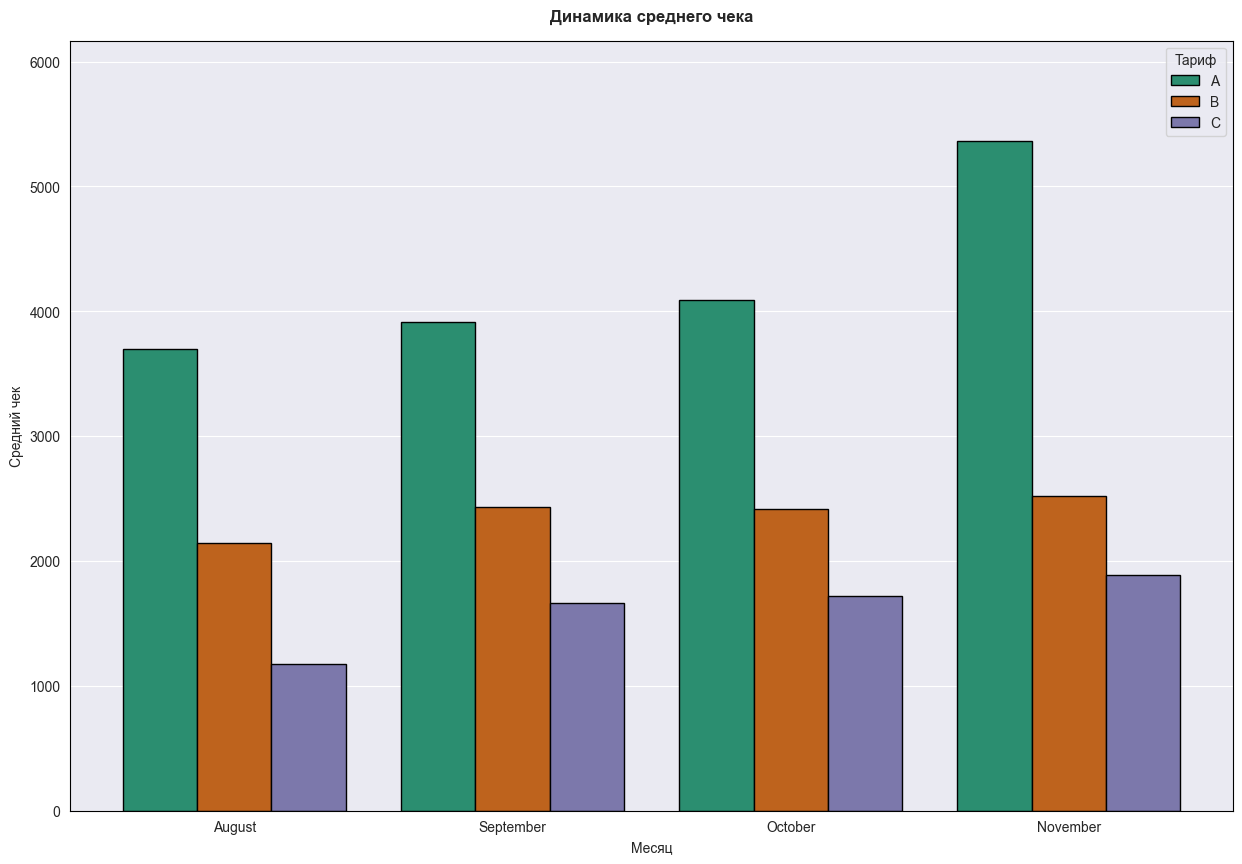

In [92]:
month_order = ['August', 'September', 'October', 'November']
fig=plt.figure(figsize=(15,10))
ax_revenue_per_client  = sns.barplot(x='month', y='rev_per_client', data=revenue_per_client, hue='tariff_plan', estimator=sum, ci=None, order=month_order) 
ax_revenue_per_client.margins(0.05, 0.15)
plt.title('Динамика среднего чека', fontweight='bold', pad=14) 
plt.xlabel('Месяц')
plt.ylabel('Средний чек')
plt.legend(title='Тариф')    
for c in ax_revenue_activ.containers:
    labels = [f'{v.get_height():.1f}' for v in c]
    ax_revenue_activ.bar_label(c, labels=labels, label_type='edge', padding=3)
plt.show()

На графике наблюдаем рост среднего чека в ноябре для клиентов использующих тариф "А" и слабовыраженный прирост среднего чека клиентов использующих тарифы "В" и "С".

###  5.9. Рассмотрим статистику переплаты за три месяца для выявленных клиентов, имеются ли особенности поведения?

Рассмотрим группу неактивных клиентов.
Расчет переплаты на текущем тарифе по сравнению с оптимальным:

In [93]:
dataset_clients_not_activ_agg['overpayment'] = dataset_clients_not_activ_agg['current_fee'] - dataset_clients_not_activ_agg['opt_fee']

C:\Users\77281\AppData\Local\Temp\ipykernel_15892\1362526222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clients_not_activ_agg['overpayment'] = dataset_clients_not_activ_agg['current_fee'] - dataset_clients_not_activ_agg['opt_fee']


Расчет переплаты в процентах:

In [94]:
dataset_clients_not_activ_agg['%overpayment'] = (dataset_clients_not_activ_agg['overpayment'] / dataset_clients_not_activ_agg['opt_fee'] * 100).round(1)
dataset_clients_not_activ_agg

C:\Users\77281\AppData\Local\Temp\ipykernel_15892\1714989320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clients_not_activ_agg['%overpayment'] = (dataset_clients_not_activ_agg['overpayment'] / dataset_clients_not_activ_agg['opt_fee'] * 100).round(1)


,user_id,tariff_plan,month,operator_cnt,total_external_mins,total_internal_mins,total_internal_over_limit,monthly,internal_out,internal_out_limit,external_out,operator,current_fee,A,B,C,opt_tariff,opt_fee,overpayment,%overpayment
12,166399,C,August,1.0,0.0,0.0,0.0,1000,0.30,0,0.7,300,1300.0,4050.0,2150.0,1300.0,C,1300.0,0.0,0.0
13,166399,C,September,1.0,0.0,0.0,0.0,1000,0.30,0,0.7,300,1300.0,4050.0,2150.0,1300.0,C,1300.0,0.0,0.0
14,166399,C,October,1.0,0.0,0.0,0.0,1000,0.30,0,0.7,300,1300.0,4050.0,2150.0,1300.0,C,1300.0,0.0,0.0
31,166481,A,August,1.0,0.0,0.0,0.0,4000,0.10,2000,0.3,50,4050.0,4050.0,2150.0,1300.0,C,1300.0,2750.0,211.5
32,166481,A,September,NaN,0.0,0.0,0.0,4000,0.10,2000,0.3,50,0.0,0.0,0.0,0.0,A,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,167939,B,October,NaN,0.0,0.0,0.0,2000,0.15,500,0.5,150,0.0,0.0,0.0,0.0,A,0.0,0.0,NaN
665,168013,C,October,NaN,0.0,0.0,0.0,1000,0.30,0,0.7,300,0.0,0.0,0.0,0.0,A,0.0,0.0,NaN
676,168025,B,October,7.0,4897.0,0.0,0.0,2000,0.15,500,0.5,150,5498.5,5819.1,5498.5,6527.9,B,5498.5,0.0,0.0
696,168093,C,October,1.0,194.0,0.0,0.0,1000,0.30,0,0.7,300,1435.8,4108.2,2247.0,1435.8,C,1435.8,0.0,0.0


Изучим статистические характеристики переплаты для неактивных клиентов с неоптимальными тарифами:

In [95]:
not_activ_wrong_tariff.groupby('tariff_plan')[['overpayment', '%overpayment']].describe()

overpayment                                                   \
                  count         mean          std    min     25%     50%   
tariff_plan                                                                
A                   3.0  2006.600000  1267.567860  543.0  1634.9  2726.8   
B                  23.0   495.852174   347.032648    0.0    55.1   635.2   
C                  12.0   545.758333  1063.278151    0.0     0.0     0.0   

                            %overpayment                               \
                75%     max        count        mean         std  min   
tariff_plan                                                             
A            2738.4  2750.0          3.0  141.566667  114.185127  9.8   
B             820.2   850.0         17.0   43.435294   19.195310  3.7   
C             307.1  3046.4          4.0   23.650000   17.781357  0.7   

                                              
                 25%     50%      75%    max  
tariff_plan                                   
A            106.600  203.40  207.450  211.5  
B             28.900   43.60   60.900   65.4  
C             14.575   26.45   35.525   41.0

В группе неактивных клиентов с неоптимальными тарифами 3 клиента использовали тариф "А" и их среднее значение переплаты составляла 141,6%, 23 клиента - тариф "В" со средней переплатой 43,4% и 12 клиентов - тариф "С" со средней переплатой 23,6%.

Таким образом, клиенты из группы "А" отказались от услуг провайдера при наличии значительной переплаты, а клиенты из группы "В" и "С" при небольшой переплате.

Рассмотрим группу активных клиентов:

In [96]:
activ_wrong_tariff = (dataset_clients_activ_agg[dataset_clients_activ_agg['tariff_plan'] != dataset_clients_activ_agg['opt_tariff']])\
.reset_index(drop=True)

In [97]:
activ_wrong_tariff.groupby('tariff_plan')[['overpayment', '%overpayment']].describe()

overpayment                                                   \
                  count         mean         std    min      25%     50%   
tariff_plan                                                                
A                  65.0  2078.744615  657.458225  312.6  1690.80  2250.0   
B                 242.0   541.539463  320.660438    0.0   331.95   604.8   
C                  68.0   233.799265  461.172258    0.0     0.00     0.0   

                               %overpayment                              \
                   75%     max        count        mean        std  min   
tariff_plan                                                               
A            2514.0000  2750.0         65.0  119.315385  64.020041  6.5   
B             839.6500  1725.4        210.0   38.330000  21.266462  0.1   
C             244.8625  2562.2         31.0   10.490323   8.739846  0.8   

                                            
                25%    50%      75%    max  
tariff_plan                                 
A            64.900  118.4  156.200  211.5  
B            21.125   39.8   63.625   65.4  
C             3.200    6.9   16.350   33.0

В группе активных клиентов с неоптимальными тарифами в 65 случаях клиенты использовали тариф "А" и их средняя переплата составляла 119,3%, в 242 случаях клиенты использовали тариф "В" со средней переплатой 38,3% и в 68 случаях клиенты использовали тариф "С" со средней переплатой 10,5%.
Для группы активных клиентов значение средней переплаты ниже, чем для группы неактивных клиентов. Вероятно меньшая переплата обеспечивает большую лояльность клиентов.

### 5.10. Сформулируем для телеком-компании предложение, стоит ли переводить на оптимальный тариф всех выявленных клиентов? Или же во избежание сильного падения выручки стоит ограничиться определенными группами клиентов? Если да, то какие группы клиентов мы рекомендуем для перевода на оптимальный тариф и что при этом будет происходить с выручкой?

У клиентов с тарифов А переплата составляет более 100%, поэтому риск уйти в отток у этих клиентов выше, чем у прочих. Поэтому логично в целях минимизации потерь компании от падения выручки перевести на на оптимальные тарифы именно эту группу клиентов.
Рассмотрим вариант падение выручки компании для этого случая:

In [98]:
clients_activ_tariff_a = dataset_clients_activ_agg.query('tariff_plan == "A"')
clients_activ_tariff_a

,user_id,tariff_plan,month,operator_cnt,total_external_mins,total_internal_mins,total_internal_over_limit,monthly,internal_out,internal_out_limit,external_out,operator,current_fee,A,B,C,opt_tariff,opt_fee,overpayment,%overpayment
23,166407,A,August,2.0,1.0,1.0,0.0,4000,0.1,2000,0.3,50,4100.3,4100.3,2300.5,1600.7,C,1600.7,2499.6,156.2
24,166407,A,September,7.0,40.0,90.0,0.0,4000,0.1,2000,0.3,50,4362.0,4362.0,3070.0,3128.0,B,3070.0,1292.0,42.1
25,166407,A,October,7.0,218.0,158.0,0.0,4000,0.1,2000,0.3,50,4415.4,4415.4,3159.0,3252.6,B,3159.0,1256.4,39.8
26,166407,A,November,8.0,124.0,120.0,0.0,4000,0.1,2000,0.3,50,4437.2,4437.2,3262.0,3486.8,B,3262.0,1175.2,36.0
71,166541,A,September,4.0,56.0,1.0,0.0,4000,0.1,2000,0.3,50,4216.8,4216.8,2628.0,2239.2,C,2239.2,1977.6,88.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,168295,A,October,NaN,0.0,0.0,0.0,4000,0.1,2000,0.3,50,0.0,0.0,0.0,0.0,A,0.0,0.0,NaN
741,168295,A,November,2.0,238.0,0.0,0.0,4000,0.1,2000,0.3,50,4171.4,4171.4,2419.0,1766.6,C,1766.6,2404.8,136.1
753,168361,A,October,23.0,21416.0,1.0,0.0,4000,0.1,2000,0.3,50,11574.8,11574.8,16158.0,22891.2,A,11574.8,0.0,0.0
754,168361,A,November,25.0,72094.0,1.0,0.0,4000,0.1,2000,0.3,50,26878.2,26878.2,41797.0,58965.8,A,26878.2,0.0,0.0


Расчет выручки для активных пользователей тарифа А при условии их перевода на оптимальный тариф:

In [99]:
revenue_activ_tariff_a = clients_activ_tariff_a['opt_fee'].sum()
revenue_activ_tariff_a.round()

226802.0

Расчет выручки для активных пользователей тарифа В и С без перевода на оптимальный тариф:

In [100]:
clients_activ_tariff_b_c = dataset_clients_activ_agg.query('tariff_plan == "B" or tariff_plan == "C"')
revenue_activ_tariff_b_c = clients_activ_tariff_b_c['current_fee'].sum()
revenue_activ_tariff_b_c.round()

1260570.0

Расчет выручки для всех пользователей при условии перевода на оптимальный тариф всех активных клиентов за четыре месяца :

In [101]:
total_revenue_opt_a = total_revenue_not_activ + revenue_activ_tariff_a + revenue_activ_tariff_b_c
total_revenue_opt_a.round()

1673710.0

Расчет падения выручки компании при условии перевода на оптимальный тариф  активных клиентов c тарифом А за четыре месяца :

In [102]:
delta_opt_a = total_revenue - total_revenue_opt_a
delta_opt.round()

282216.0

Расчет падения выручки в процентах:

In [103]:
share_delta_opt_activ_tariff_a = ((total_revenue - total_revenue_opt_a)/total_revenue*100).round(1)
share_delta_opt_activ_tariff_a

7.5

In [104]:
share_delta_opt

15.6

У клиентов с тарифов А переплата составляет более 100%, поэтому риск уйти в отток у этих клиентов выше, чем у прочих. Поэтому логично в целях минимизации потерь компании от падения выручки перевести на на оптимальные тарифы именно эту группу клиентов.  В этом случае падение выручки компании составило бы 282.216 рублей (7,5%). Таким образом компания снизит падение выручки более чем в два раза по сравнению с переводом на оптимальные тарифы всех активных клиентов (падение выручки 15,6%).

 При переводе на оптимальный тариф только активных клиентов с тарифами А падение выручки компании составило бы 282.216 рублей (7,5%). Таким образом компания снизит падение выручки более чем в два раза по сравнению с переводом на оптимальные тарифы всех активных клиентов (падение выручки 15,6%).

## 6. Проверка статистических гипотез

### Гипотеза №1. При переводе на оптимальный тариф всех активных клиентов средний чек упадет значительно.

Выдвинем гипотезы:

- Нулевая гипотеза (H0) - средний чек не изменится при переводе всех клиентов на оптимальные тарифы.
- Альтернативная гипотеза (H1) - средний чек изменится при переводе клиентов на оптимальные тарифы.

Изучим распределение переменных, чтобы определиться с критерием сравнения выборок:

In [122]:
# Функция построения гистограмм 
def graph_hist(data, xvalue, title, xlabel):
    fig_revenue = plt.figure(figsize=(8,3.5))
    ax_revenue = sns.histplot(data, x=xvalue, kde=True)
    ax_revenue.set_title(title, fontweight='bold', pad=14)
    ax_revenue.set_xlabel(xlabel)
    ax_revenue.set_ylabel('Частота')
    plt.show()

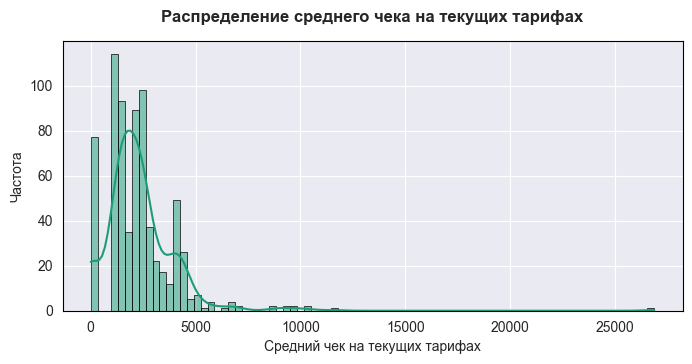

In [123]:
graph_hist(dataset_clients_activ_agg,'current_fee',
           'Распределение среднего чека на текущих тарифах', 'Средний чек на текущих тарифах')

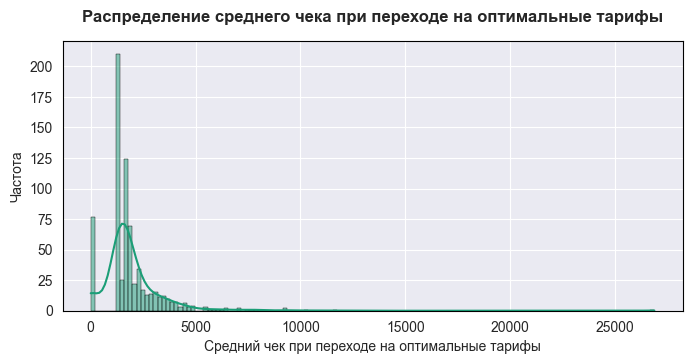

In [124]:
graph_hist(dataset_clients_activ_agg,'opt_fee',
           'Распределение среднего чека при переходе на оптимальные тарифы', 'Средний чек при переходе на оптимальные тарифы')

Распределение переменных отличается от нормального. 
Проверку гипотез осуществим с помощью непараметрического статистического критерия оценки различий между двумя независимыми выборками Манна-Уитни (U-критерий).

In [125]:
#вызов метода для проверки гипотезы
results = st.mannwhitneyu(
     dataset_clients_activ_agg['current_fee'], 
    dataset_clients_activ_agg['opt_fee']
) 
alpha = 0.05 # критический уровень статистической значимости
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

7.23391451449172e-11
Отвергаем нулевую гипотезу


Вывод: средний чек статистически значимо изменится при переводе всех клиентов на оптимальные тарифы.

In [126]:
#вызов метода для проверки гипотезы
results = st.mannwhitneyu(
     dataset_clients_activ_agg['current_fee'], 
    dataset_clients_activ_agg['opt_fee']
) 
alpha = 0.01 # критический уровень статистической значимости
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

7.23391451449172e-11
Отвергаем нулевую гипотезу


Вывод: 
При переводе на оптимальный тариф всех активных клиентов средний чек упадет значительно. Гипотеза подтвердилась как для расчета с коэффициэнтом значимости alpha = 0.05, так и для alpha = 0.01.

### Гипотеза №2. При переводе на оптимальный тариф активных клиентов с тарифом "A" средний чек упадет .

Выдвинем гипотезы:

Нулевая гипотеза (H0) - средний чек не изменится при переводе на оптимальные тарифы только клиентов тарифа А .
Альтернативная гипотеза (H1) - средний чек изменится при переводе на оптимальные тарифы только клиентов тарифа А .

Добавляем столбец с расходами при оптимизации тарифов только для коиентов с тарифом А :

In [127]:
dataset_clients_activ_agg.loc[dataset_clients_activ_agg['tariff_plan'] == 'A', 'opt_fee_a'] = dataset_clients_activ_agg['opt_fee']
dataset_clients_activ_agg.loc[dataset_clients_activ_agg['tariff_plan'] != 'A', 'opt_fee_a'] = dataset_clients_activ_agg['current_fee']
dataset_clients_activ_agg

C:\Users\77281\AppData\Local\Temp\ipykernel_37412\2745282841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clients_activ_agg.loc[dataset_clients_activ_agg['tariff_plan'] == 'A', 'opt_fee_a'] = dataset_clients_activ_agg['opt_fee']


,user_id,tariff_plan,month,operator_cnt,total_external_mins,total_internal_mins,total_internal_over_limit,monthly,internal_out,internal_out_limit,...,operator,current_fee,A,B,C,opt_tariff,opt_fee,overpayment,%overpayment,opt_fee_a
0,166377,B,August,5.0,1301.0,2.0,0.0,2000,0.15,500,...,150,3400.5,4640.3,3400.50,3410.7,B,3400.5,0.0,0.0,3400.5
1,166377,B,September,4.0,1764.0,1.0,0.0,2000,0.15,500,...,150,3482.0,4729.2,3482.00,3434.8,C,3434.8,47.2,1.4,3482.0
2,166377,B,October,5.0,1654.0,1.0,0.0,2000,0.15,500,...,150,3577.0,4746.2,3577.00,3657.8,B,3577.0,0.0,0.0,3577.0
3,166377,B,November,4.0,1590.0,3.0,0.0,2000,0.15,500,...,150,3395.0,4677.0,3395.00,3313.0,C,3313.0,82.0,2.5,3395.0
4,166391,C,August,2.0,0.0,1.0,1.0,1000,0.30,0,...,300,1600.3,4100.1,2300.15,1600.0,C,1600.0,0.3,0.0,1600.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,168583,B,November,2.0,0.0,0.0,0.0,2000,0.15,500,...,150,2300.0,4100.0,2300.00,1600.0,C,1600.0,700.0,43.8,2300.0
784,168598,C,November,1.0,0.0,0.0,0.0,1000,0.30,0,...,300,1300.0,4050.0,2150.00,1300.0,C,1300.0,0.0,0.0,1300.0
785,168601,C,November,2.0,554.0,0.0,0.0,1000,0.30,0,...,300,1987.8,4266.2,2577.00,1987.8,C,1987.8,0.0,0.0,1987.8
786,168603,B,November,1.0,20.0,0.0,0.0,2000,0.15,500,...,150,2160.0,4056.0,2160.00,1314.0,C,1314.0,846.0,64.4,2160.0


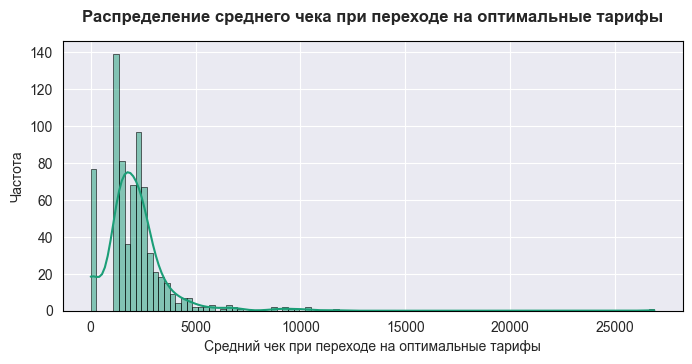

In [128]:
graph_hist(dataset_clients_activ_agg,'opt_fee_a',
           'Распределение среднего чека при переходе на оптимальные тарифы', 'Средний чек при переходе на оптимальные тарифы')

Распределение переменных отличается от нормального. Проверку гипотез осуществим с помощью непараметрического статистического критерия оценки различий между двумя независимыми выборками Манна-Уитни (U-критерий).

In [129]:
#вызов метода для проверки гипотезы
results = st.mannwhitneyu(
     dataset_clients_activ_agg['current_fee'], 
    dataset_clients_activ_agg['opt_fee_a']
) 
alpha = 0.05 # критический уровень статистической значимости
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.016360472086159213
Отвергаем нулевую гипотезу


In [130]:
#вызов метода для проверки гипотезы
results = st.mannwhitneyu(
     dataset_clients_activ_agg['current_fee'], 
    dataset_clients_activ_agg['opt_fee_a']
) 
alpha = 0.01 # критический уровень статистической значимости
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.016360472086159213
Не получилось отвергнуть нулевую гипотезу


Вывод: 
Гипотеза о том, что при переводе на оптимальный тариф только активных клиентов с тарифом "A" средний чек упадет, подтвердилась для расчета с коэффициэнтом статистической значимости alpha = 0.05 и была опровергнута для расчета с коэффициэнтом статистической значимости alpha = 0.01.
Таким образом можем сделать вывод, что при переводе на оптимальный тариф только активных клиентов с тарифом "A" средний чек не изменится.

### Выводы:

**Изучение данных в разрезе тарифного плана показало, что:**

- Распределение клиентов по тарифам неравномерное: на самом дорогом тарифе самое меньшее количество клиентов, а наибольшее количество клиентов на самом дешевом тарифе. Тариф "А" выбрали 33 (10,8%), тариф "В" - 112 (36,6%) и тариф "С" - 161 (52,6%) клиентов.
- Распределение операторов по тарифам обратно распределению клиентов по тарифам. На самом дорогом тарифе видим наибольшее количество операторов, и наименьшее количество операторов на самом дешевом тарифе. Клиенты, использующие самый дорогой тариф А, имеют наибольшее количество операторов - в штате 75% колл-центров состоят до 8,5 операторов; За ним следует тариф В - в штате 75% колл-центров состоят до 5 операторов; У клиентов, использующих самый дешевый тариф С, число операторов наименьшее - в штате 75% колл-центров состоят до 3 операторов.

**Изучение данных в разрезе времени показало, что:**

- Наблюдаем рост количества звонков от месяца к месяцу. Вероятно это связано с ростом общей деловой активности после летнего затишья. При этом наибольшие скачки наблюдаем при сравнении данных за август и сентябрь, а затем при сравнении данных сентября и октября. При сравнении данных октября и ноября видим, что темп роста уменьшился, деловая активность приближается к своему плато.
- Распределение длительности звонков по месяцам имеет тот же характер, что мы наблюдали выше при изучении количества звонков по месяцам. Это подтверждает наши выводы об общем росте деловой активности в осенние месяцы. Распределение длительности звонков с учетом времени ожидания не выявило аномалий и имеет тот же характер, что и распределение длительности звонков без учета времени ожидания.
- Наблюдаем рост количества клиентов, звонивших хоть один раз, с августа по октябрь, в ноябре незначительный спад по сравнению с октябрем, что подтверждает наше предположение о выходе деловой активности на плато к середине осени.
- Изучение количества дней, в которые колл-центры совершали звонки, по месяцам, так же подтвердило усиление активности в осенний период. Так, в августе у 75% колл-центров количество рабочих дней достигало 9, в сентябре тот же показатель вырос до 18, а в октябре и ноябре видим рост до 23. Так же наблюдаем рост медианного количества рабочих дней, то есть с каждым новым месяцем колл-центры работали больше.
- Распределение количества звонков по дням недели показал большое различие в количестве звонков в будни по сравнению с выходными днями. При этом количество звонков в субботу составляет примерно треть от показателей будних дней, а в воскресенье звонков еще меньше - около четверти. С понедельника по пятницу количество звонков различается не сильно, можно выделить лишь небольшое увеличение количества звонков в четверг и небольшое снижение в пятницу.
- Изучение количества зарегистрированных клиентов по дням с разбивкой по тарифному плану показало, что быстрее всего росло количество клиентов на тарифе C. Темп роста количества клиентов на тарифе В в августе был выше, чем у клиентов с тарифом А, в сентябре и октябре темпы роста были примерно одинаковые, а в ноябре темп роста клиентов на тарифе В начал отставать от тарифа А. Медленнее всего идет рост количества клиентов с самым дорогим тарифом А.




**Подсчитали общую выручку, т.е. расходы по тарифным планам для всех пользователей.** 

Общая выручка компании за изучаемый период составляет 1.808.828 рублей.

**Выявили активных клиентов, то есть тех, кто отработал минимум 10 дней в ноябре.**

Среди активных клиентов нашли тех, кто переплачивает за услуги телеком-компании на текущем тарифе. Подобрали для каждого переплачивающего клиента оптимальный тариф. 

**Подсчитали общую сумму переплаты для активных клиентов, она составила 16.136 рублей.**

**Посчитали общую выручку телеком-компании (расходы по тарифным планам для всех пользователей) после оптимизации тарифов активных пользователей, она составила 1.526.612 рублей.**

**Падение выручки компании при условии перевода на оптимальный тариф всех активных клиентов за четыре месяца составит 282.216 или 15,6%.**

**Провели анализ выручки по группам неактивных и активных клиентов:**

- Для неактивных клиентов наблюдаем рост выручки с августа по сентябрь для клиентов всех тарифов, и падение выручки в ноябре для клиентов тарифов В и С. Для клиентов тарифа А наблюдаем стабильный рост выручки так же и в ноябре месяце. 
- Для активных клиентов наблюдаем стабильный рост выручки в течении всего наблюдаемого периода. Также видим, в августе и в сентябре самую большую выручку приносили клиенты тарифа В, а в октябре и ноябре наибольшую выручку принесли клиенты тарифа С.

**Проанализировали распределение неактивных клиентов по тарифам:**

- Доля клиентов, которые перестали пользоваться услугами компании, составила для тарифа "А" 24,2%, тарифа "В" - 21,4% и тарифа "С" - 32,9%.
- Выяснили, что 44,7% клиентов из неактивных пользовались неэффективными тарифами.
- При этом выявили 5 случаев использования оптимальных тарифов для клиентов с тарифом "А", 1 случай для клиента с тарифом "В" и 41 случай для клиента с тарифом "С". В 2-х случаях для клиентов, использующих тариф "А", и в 17 случаях для клиентов, использующих тариф "В", оптимальным являлся тариф "С". На тариф "В" было бы выгоднее перейти в 1 случае клиенту с тарифом "А" и в 2-х случаях клиентам с тарифом "С". На тариф "А" было бы выгодно перейти в 6-ти случаях клиентам с тарифом "В" и в 10-ти случаях клиентам с тарифом "С".

**Изучили изменение среднего чека в разрезе тарифа и времени:**

- Самые большие средние чеки за 4 месяца отмечены для клиентов использующих тариф "А" - 4264,50 рублей. Средний чек клиентов использующих тариф "В" составляет 2378,21 рублей и наименьший средний чек у клиентов использующих тариф "С" - 1609,77 рублей.
- Наблюдаем рост среднего чека в ноябре для клиентов использующих тариф "А" и слабовыраженный прирост среднего чека клиентов использующих тарифы "В" и "С".

**Рассмотрели статистику переплаты за три месяца для выявленных групп клиентов:**

- Для неактивных клиентов выявили 5 случаев использования оптимальных тарифов для клиентов с тарифом "А", 1 случай для клиента с тарифом "В" и 41 случай для клиента с тарифом "С". В 2-х случаях для клиентов, использующих тариф "А", и в 17 случаях для клиентов, использующих тариф "В", оптимальным являлся тариф "С". На тариф "В" было бы выгоднее перейти в 1 случае клиенту с тарифом "А" и в 2-х случаях клиентам с тарифом "С". На тариф "А" было бы выгодно перейти в 6-ти случаях клиентам с тарифом "В" и в 10-ти случаях клиентам с тарифом "С".
- В группе активных клиентов с неоптимальными тарифами в 65 случаях клиенты использовали тариф "А" и их средняя переплата составляла 119,3%, в 242 случаях клиенты использовали тариф "В" со средней переплатой 38,3% и в 68 случаях клиенты использовали тариф "С" со средней переплатой 10,5%. Для группы активных клиентов значение средней переплаты ниже, чем для группы неактивных клиентов. Вероятно меньшая переплата обеспечивает большую лояльность клиентов.



**Рассмотрели вариант перевода на оптимальный тариф только клиентов с наибольшей переплатой:**

У клиентов с тарифов А переплата составляет более 100%, поэтому риск уйти в отток у этих клиентов выше, чем у прочих. Поэтому логично в целях минимизации потерь компании от падения выручки перевести на на оптимальные тарифы именно эту группу клиентов.  В этом случае падение выручки компании составило бы 282.216 рублей (7,5%). Таким образом компания снизит падение выручки более чем в два раза по сравнению с переводом на оптимальные тарифы всех активных клиентов (падение выручки 15,6%).

**Проверили статистические гипотезы:**

Выдвинули гипотезы:

Гипотеза 1:
- Нулевая гипотеза (H0) - средний чек не изменится при переводе всех клиентов на оптимальные тарифы.
- Альтернативная гипотеза (H1) - средний чек изменится при переводе клиентов на оптимальные тарифы.

При переводе на оптимальный тариф всех активных клиентов средний чек упадет значительно. Гипотеза подтвердилась как для расчета с коэффициэнтом значимости alpha = 0.05, так и для alpha = 0.01.

Гипотеза 2:
- Нулевая гипотеза (H0) - средний чек не изменится при переводе на оптимальные тарифы только клиентов тарифа А .
- Альтернативная гипотеза (H1) - средний чек изменится при переводе на оптимальные тарифы только клиентов тарифа А .

Гипотеза о том, что при переводе на оптимальный тариф только активных клиентов с тарифом "A" средний чек упадет, подтвердилась для расчета с коэффициэнтом статистической значимости alpha = 0.05 и была опровергнута для расчета с коэффициэнтом статистической значимости alpha = 0.01. Таким образом можем сделать вывод, что при переводе на оптимальный тариф только активных клиентов с тарифом "A" средний чек не изменится.

**Рекомендации для компании:**

Для повышения лояльности клиентов рекомендуем предложить перевод на оптимальные тарифы всем активным клиентам, использующим тариф А. Это позволит увеличить удержание клиентов, при сохранении выручки компании без статистически значимых потерь. 

[Скачать презентацию]( https://www.dropbox.com/scl/fi/lghqsuc9pnqd6j4dgxe7a/.pdf?rlkey=af1adkbutxh6quhix9yaogmjg&dl=0)

[Посмотреть дашборд]( https://public.tableau.com/app/profile/anna.fedorova1016/viz/_16928107437550/Dashboard1?publish=yes)